In [5]:
#Import packages

from datetime import datetime
from dateutil import parser
import re #importing regular expressions
import numpy as np #used for scientific computation
import pandas as pd #used for data mugging and preprocessing
import matplotlib.pyplot as plt #data visualization library
from pandas import DataFrame as show # dataframe is the optimised structure used here to clean and analyse data
import seaborn as sns # stastical visualization library
import squarify #used to make square area plots
%matplotlib inline #used in jupyter notebook for interactive visualizations within notebook
#from sklearn.linear_model import LogisticRegression

import os
import seaborn as sns
from sklearn import preprocessing
from matplotlib import rcParams
import warnings
warnings.filterwarnings("ignore") 


UsageError: unrecognized arguments: #used in jupyter notebook for interactive visualizations within notebook


In [6]:
import shutil

file_1 = "user-ct-test-collection-02.txt"
copy_file = "copy_file_1.txt"
shutil.copy(file_1, copy_file)

'copy_file_1.txt'

In [7]:
df_1 = pd.read_csv('copy_file_1.txt',sep="\t")
df_1.to_csv('copy_file_1.csv')

In [8]:
def file_line_count_gh(fname):
        with open(fname) as f:
                for i, l in enumerate(f):
                        pass
        return i + 1
    
print("Number of lines in the file copy_file_1.txt: ", file_line_count_gh("copy_file_1.txt"))
print("Number of lines in the file user-ct-test-collection-02.txt: ", file_line_count_gh("user-ct-test-collection-02.txt"))
print("Number of lines in the file copy_file_1.csv: ", file_line_count_gh("copy_file_1.csv"))

Number of lines in the file copy_file_1.txt:  3614507
Number of lines in the file user-ct-test-collection-02.txt:  3614507
Number of lines in the file copy_file_1.csv:  3614507


In [9]:
dataframe_df_shape = df_1.shape
print(dataframe_df_shape)

(3614506, 5)


In [147]:
dataframe_of_ctart_to_end_line = df_1
dataframe_of_ctart_to_end_line.head()

,AnonID,Query,QueryTime,ItemRank,ClickURL
0,479,family guy,2006-03-01 16:01:20,0.000001,link not clicked
1,479,also sprach zarathustra,2006-03-02 14:48:55,0.000001,link not clicked
2,479,family guy movie references,2006-03-03 22:37:46,1.000000,http://www.familyguyfiles.com
3,479,top grossing movies of all time,2006-03-03 22:42:42,1.000000,http://movieweb.com
4,479,top grossing movies of all time,2006-03-03 22:42:42,2.000000,http://www.imdb.com


In [12]:
dataframe_of_ctart_to_end_line.tail()

,AnonID,Query,QueryTime,ItemRank,ClickURL
3614501,24969423,my space. com,2006-05-31 19:03:32,2.0,http://music.myspace.com
3614502,24969423,my space.com,2006-05-31 19:12:00,NaN,NaN
3614503,24969423,my space.com 3131560415,2006-05-31 19:12:25,NaN,NaN
3614504,24969423,jennifer craford my space.com,2006-05-31 19:15:02,NaN,NaN
3614505,24969423,jennifer crawford my space.com,2006-05-31 19:16:05,NaN,NaN


In [13]:
dataframe_of_ctart_to_end_line.shape

(3614506, 5)

In [14]:
#df = dataframe_of_ctart_to_end_line

In [15]:
print("Information of total number of non-empty columns")
print("-------------------------------------------------")
print(dataframe_of_ctart_to_end_line.info(null_counts=True))

Information of total number of non-empty columns
-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3614506 entries, 0 to 3614505
Data columns (total 5 columns):
AnonID       3614506 non-null int64
Query        3614377 non-null object
QueryTime    3614506 non-null object
ItemRank     1935613 non-null float64
ClickURL     1935613 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 137.9+ MB
None


In [16]:
print('Rows {rows} in total and Columns {columns} in total'.format(rows=dataframe_of_ctart_to_end_line.shape[0],columns=dataframe_of_ctart_to_end_line.shape[1]))

Rows 3614506 in total and Columns 5 in total


In [17]:
print("Columns and their datatypes")
dataframe_of_ctart_to_end_line.dtypes #.dtypes are used to display datatypes of each column

Columns and their datatypes


AnonID         int64
Query         object
QueryTime     object
ItemRank     float64
ClickURL      object
dtype: object

In [18]:
print("Frequency count of missing values")
dataframe_of_ctart_to_end_line.apply(lambda X:sum(X.isnull())) 
#apply function is used to do mapping column-wise
#apply function can apply tranformations to each column individually

Frequency count of missing values


AnonID             0
Query            129
QueryTime          0
ItemRank     1678893
ClickURL     1678893
dtype: int64

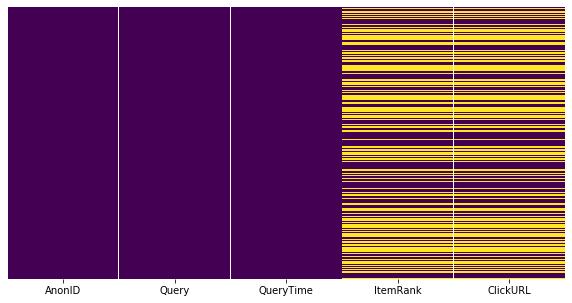

In [19]:
plt.figure(figsize=(10,5)) #plt is the object of matplot lib and .figure() is used to show or change properties of graphs
sns.heatmap(dataframe_of_ctart_to_end_line.isnull(),cmap='viridis',yticklabels=False,cbar=False)#heatmaps are matrix plots which can visualize data in 2D
plt.show()

In [20]:
dates = []
pattern_found = []
patn = re.compile(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}')
fh = open('copy_file_1.csv')
count_1 = 0
for line in fh:
    count_1 = count_1 + 1
    for match in patn.findall(line):
        #print(match)
        #res = line.partition(match)[2]
        #print(res)
        try:
            val = datetime.strptime(match, '%Y-%m-%d %H:%M:%S')
            #val = datetime.strptime(match, '%Y-%m-%d')
            #val = parser.parse(str(val))
            dates.append(val)
            pattern_found.append(match)
        except ValueError:
            pass # ignore, this isn't a data

In [21]:
print("total row in copy_file_1.csv file = ", dataframe_of_ctart_to_end_line.shape[0])
print("total dates found = ", len(dates))
print("total match found = ", len(pattern_found))
if (dataframe_of_ctart_to_end_line.shape[0] == len(dates) == len(pattern_found)):
    print("dates or QueryTime column data format are found same.")
else:
    print("dates or QueryTime column data format are not same.")

total row in copy_file_1.csv file =  3614506
total dates found =  3614506
total match found =  3614506
dates or QueryTime column data format are found same.


In [22]:
dataframe_of_ctart_to_end_line["ItemRank"].unique()

array([ nan,   1.,   2.,   4.,   5.,   9.,   3.,   7.,   6.,  10.,  69.,
        20.,  22.,  66., 104.,   8.,  12.,  14.,  16.,  18.,  26.,  40.,
        68.,  75.,  85.,  88.,  93.,  94., 117.,  24.,  11.,  19.,  35.,
        74.,  79.,  81.,  86.,  51.,  17.,  38.,  43.,  46.,  48.,  13.,
        23.,  29.,  50.,  28.,  25.,  21.,  34.,  30.,  32.,  37.,  39.,
        15.,  33.,  44.,  27.,  55.,  65.,  78.,  95.,  96., 101., 102.,
       122.,  73., 112., 139., 146., 154., 163., 174., 177., 185., 216.,
       231., 262., 268., 273., 294., 304., 307.,  36.,  71.,  31.,  57.,
       113.,  41.,  83.,  45., 212., 276., 316., 326., 332., 350., 127.,
        53.,  49.,  72., 129., 131., 143.,  89., 115., 114., 108., 155.,
        58.,  63.,  54.,  76.,  80., 134., 269., 331., 381., 423., 498.,
        42., 106., 153., 169.,  77., 140., 136., 189., 157., 168., 124.,
       137., 138., 191., 198., 204.,  47.,  64., 142., 156., 186., 283.,
       132., 133., 141.,  61.,  70.,  52.,  59.,  6

In [23]:
1 in dataframe_of_ctart_to_end_line["ItemRank"].unique()

True

In [24]:
np.nan in dataframe_of_ctart_to_end_line["ItemRank"].unique()

False

In [148]:
dataframe_of_ctart_to_end_line['ItemRank']=dataframe_of_ctart_to_end_line['ItemRank'].fillna(value=0.000001)

In [149]:
dataframe_of_ctart_to_end_line["ClickURL"].unique()

array(['link not clicked', 'http://www.familyguyfiles.com',
       'http://movieweb.com', ..., 'http://www.lmp.ualberta.ca',
       'http://www.cptc.ctc.edu', 'http://www.mbajungle.com'],
      dtype=object)

In [27]:
'http://www.imdb.com' in dataframe_of_ctart_to_end_line["ClickURL"].unique()

True

In [28]:
'link not clicked' in dataframe_of_ctart_to_end_line["ClickURL"].unique()

False

In [150]:
dataframe_of_ctart_to_end_line['ClickURL']=dataframe_of_ctart_to_end_line['ClickURL'].fillna(value="link not clicked")

In [30]:
dataframe_of_ctart_to_end_line["ClickURL"].unique()

array(['link not clicked', 'http://www.familyguyfiles.com',
       'http://movieweb.com', ..., 'http://www.lmp.ualberta.ca',
       'http://www.cptc.ctc.edu', 'http://www.mbajungle.com'],
      dtype=object)

In [31]:
print(len(dataframe_of_ctart_to_end_line["Query"]) - dataframe_of_ctart_to_end_line["Query"].count())
print(dataframe_of_ctart_to_end_line[dataframe_of_ctart_to_end_line.Query == np.nan].shape[0])
print(dataframe_of_ctart_to_end_line[dataframe_of_ctart_to_end_line.Query == ''].shape[0])
print(dataframe_of_ctart_to_end_line[dataframe_of_ctart_to_end_line.Query == '-'].shape[0])
print(dataframe_of_ctart_to_end_line[dataframe_of_ctart_to_end_line.Query == '--'].shape[0])
print(dataframe_of_ctart_to_end_line[dataframe_of_ctart_to_end_line.Query == '---'].shape[0])
print(dataframe_of_ctart_to_end_line[dataframe_of_ctart_to_end_line.Query == '----'].shape[0])
print(dataframe_of_ctart_to_end_line[dataframe_of_ctart_to_end_line.Query == '-----'].shape[0])

129
0
0
98554
13
17
3
0


In [151]:
dataframe_of_ctart_to_end_line["Query"] = dataframe_of_ctart_to_end_line["Query"].fillna(value="query not searched")
dataframe_of_ctart_to_end_line["Query"] = dataframe_of_ctart_to_end_line["Query"].replace('', "query not searched")
dataframe_of_ctart_to_end_line["Query"] = dataframe_of_ctart_to_end_line["Query"].replace('-', "query not searched")
dataframe_of_ctart_to_end_line["Query"] = dataframe_of_ctart_to_end_line["Query"].replace('--', "query not searched")
dataframe_of_ctart_to_end_line["Query"] = dataframe_of_ctart_to_end_line["Query"].replace('---', "query not searched")
dataframe_of_ctart_to_end_line["Query"] = dataframe_of_ctart_to_end_line["Query"].replace('----', "query not searched")

In [33]:
print(len(dataframe_of_ctart_to_end_line["Query"]) - dataframe_of_ctart_to_end_line["Query"].count())
print(dataframe_of_ctart_to_end_line[dataframe_of_ctart_to_end_line.Query == np.nan].shape[0])
print(dataframe_of_ctart_to_end_line[dataframe_of_ctart_to_end_line.Query == ''].shape[0])
print(dataframe_of_ctart_to_end_line[dataframe_of_ctart_to_end_line.Query == '-'].shape[0])
print(dataframe_of_ctart_to_end_line[dataframe_of_ctart_to_end_line.Query == '--'].shape[0])
print(dataframe_of_ctart_to_end_line[dataframe_of_ctart_to_end_line.Query == '---'].shape[0])
print(dataframe_of_ctart_to_end_line[dataframe_of_ctart_to_end_line.Query == '----'].shape[0])
print(dataframe_of_ctart_to_end_line[dataframe_of_ctart_to_end_line.Query == '-----'].shape[0])
print(dataframe_of_ctart_to_end_line[dataframe_of_ctart_to_end_line.Query == 'query not searched'].shape[0])

0
0
0
0
0
0
0
0
98716


In [34]:
dataframe_of_ctart_to_end_line["Query"].unique()

array(['family guy', 'also sprach zarathustra',
       'family guy movie references', ..., 'my space.com 3131560415',
       'jennifer craford my space.com', 'jennifer crawford my space.com'],
      dtype=object)

In [35]:
dataframe_of_ctart_to_end_line

,AnonID,Query,QueryTime,ItemRank,ClickURL
0,479,family guy,2006-03-01 16:01:20,0.000001,link not clicked
1,479,also sprach zarathustra,2006-03-02 14:48:55,0.000001,link not clicked
2,479,family guy movie references,2006-03-03 22:37:46,1.000000,http://www.familyguyfiles.com
3,479,top grossing movies of all time,2006-03-03 22:42:42,1.000000,http://movieweb.com
4,479,top grossing movies of all time,2006-03-03 22:42:42,2.000000,http://www.imdb.com
...,...,...,...,...,...
3614501,24969423,my space. com,2006-05-31 19:03:32,2.000000,http://music.myspace.com
3614502,24969423,my space.com,2006-05-31 19:12:00,0.000001,link not clicked
3614503,24969423,my space.com 3131560415,2006-05-31 19:12:25,0.000001,link not clicked
3614504,24969423,jennifer craford my space.com,2006-05-31 19:15:02,0.000001,link not clicked


In [36]:
dataframe_of_ctart_to_end_line.head()

,AnonID,Query,QueryTime,ItemRank,ClickURL
0,479,family guy,2006-03-01 16:01:20,0.000001,link not clicked
1,479,also sprach zarathustra,2006-03-02 14:48:55,0.000001,link not clicked
2,479,family guy movie references,2006-03-03 22:37:46,1.000000,http://www.familyguyfiles.com
3,479,top grossing movies of all time,2006-03-03 22:42:42,1.000000,http://movieweb.com
4,479,top grossing movies of all time,2006-03-03 22:42:42,2.000000,http://www.imdb.com


In [37]:
dataframe_of_ctart_to_end_line.tail()

,AnonID,Query,QueryTime,ItemRank,ClickURL
3614501,24969423,my space. com,2006-05-31 19:03:32,2.000000,http://music.myspace.com
3614502,24969423,my space.com,2006-05-31 19:12:00,0.000001,link not clicked
3614503,24969423,my space.com 3131560415,2006-05-31 19:12:25,0.000001,link not clicked
3614504,24969423,jennifer craford my space.com,2006-05-31 19:15:02,0.000001,link not clicked
3614505,24969423,jennifer crawford my space.com,2006-05-31 19:16:05,0.000001,link not clicked


In [38]:
print("Frequency count of missing values")
dataframe_of_ctart_to_end_line.apply(lambda X:sum(X.isnull())) 

Frequency count of missing values


AnonID       0
Query        0
QueryTime    0
ItemRank     0
ClickURL     0
dtype: int64

In [39]:
print("Columns and their datatypes")
dataframe_of_ctart_to_end_line.dtypes #.dtypes are used to display data

Columns and their datatypes


AnonID         int64
Query         object
QueryTime     object
ItemRank     float64
ClickURL      object
dtype: object

In [40]:
dataframe_of_ctart_to_end_line['ClickURL'].value_counts().head(11)

link not clicked                1678893
http://www.google.com             36103
http://www.yahoo.com              16271
http://www.myspace.com            15977
http://en.wikipedia.org           12275
http://www.amazon.com             11030
http://www.imdb.com                9791
http://www.mapquest.com            9402
http://www.ebay.com                7613
http://mail.yahoo.com              4814
http://www.bankofamerica.com       4495
Name: ClickURL, dtype: int64

In [41]:
dataframe_of_ctart_to_end_line["ClickURL"].nunique()

389404

In [42]:
dataframe_of_ctart_to_end_line.groupby(['ClickURL']).count() 

,AnonID,Query,QueryTime,ItemRank
ClickURL,,,,
ftp://dftp.maritimemagazine.com/mn200502o2.pdf,2,2,2,2
http:www.hotmail.com,1,1,1,1
http://,2,2,2,2
http:// adulted.about.com,1,1,1,1
http:// crime.about.com,1,1,1,1
...,...,...,...,...
https://wx9.registeredsite.com/user1024624/miva/merchant.mv?screen=ctgy&store_code=sarong&category_code=cp,1,1,1,1
https://wx9.registeredsite.com/user1024624/miva/merchant.mv?screen=plst&store_code=sarong,1,1,1,1
https://yosemite.epa.gov/opei/ptrack.nsf/vaprviewp,1,1,1,1


In [43]:
def convert_Slash(x):#converts citylocation where multiple citiescentres
    x=x.lower()#converting  whole data to lower case to avoid dublicate entries 
    return x
dataframe_of_ctart_to_end_line['Query']=dataframe_of_ctart_to_end_line['Query'].apply(convert_Slash)
dataframe_of_ctart_to_end_line['ClickURL']=dataframe_of_ctart_to_end_line['ClickURL'].apply(convert_Slash)

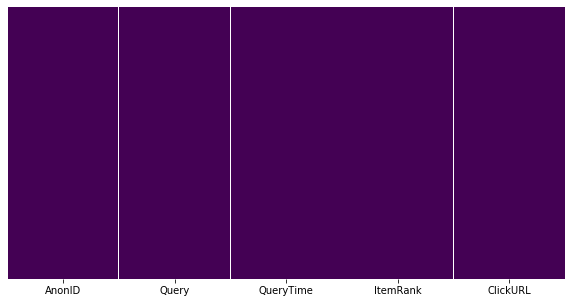

In [44]:
plt.figure(figsize=(10,5))
sns.heatmap(dataframe_of_ctart_to_end_line.isnull(),cmap='viridis',yticklabels=False,cbar=False)
plt.show()

In [45]:
pd.DataFrame(dataframe_of_ctart_to_end_line.describe()['ItemRank'].astype(int))

,ItemRank
count,3614506
mean,3
std,15
min,0
25%,0
50%,1
75%,2
max,500


In [46]:
print("unique query count = ", dataframe_of_ctart_to_end_line['Query'].nunique())
print("unique clickurl count = ", dataframe_of_ctart_to_end_line['ClickURL'].nunique())

unique query count =  1244492
unique clickurl count =  389404


In [47]:
itemrank_by_query=pd.DataFrame(dataframe_of_ctart_to_end_line.groupby('Query')['ItemRank'].sum().sort_values(ascending=False))
itemrank_by_query.head(10)

,ItemRank
Query,
query not searched,90772.067332
imgboard bbs,54993.000000
free live web cams,50423.000043
country style home decor,37897.000086
imgboard,34821.000011
incest porn,30715.000020
google,29552.006595
www.letstalkhonestly.com,29504.000884
kjekstad,27444.000093


In [48]:
itemrank_occurence_count_by_query_data=pd.DataFrame(dataframe_of_ctart_to_end_line.groupby('Query')['ItemRank'].value_counts().sort_values(ascending=False))
itemrank_occurence_count_by_query_data.head(10)

ItemRank
Query              ItemRank          
query not searched 0.000001     67332
google             1.000000     25102
query not searched 1.000000     15323
yahoo              1.000000      9119
google             0.000001      6595
ebay               0.000001      6410
                   1.000000      5572
myspace            1.000000      5552
google.com         1.000000      5209
mapquest           1.000000      5015

In [49]:
dataframe_of_ctart_to_end_line['ClickURL'].value_counts().head()

link not clicked           1678893
http://www.google.com        36103
http://www.yahoo.com         16271
http://www.myspace.com       15977
http://en.wikipedia.org      12275
Name: ClickURL, dtype: int64

In [50]:
df_neu_gh = dataframe_of_ctart_to_end_line.groupby(["Query"])['ClickURL'].value_counts().sort_values(ascending=False).to_frame()
print(df_neu_gh)

                                          ClickURL
Query              ClickURL                       
query not searched link not clicked          67332
google             http://www.google.com     25177
yahoo              http://www.yahoo.com       9083
google             link not clicked           6595
ebay               link not clicked           6410
...                                            ...
pindepote.com      link not clicked              1
pinder forte       link not clicked              1
pindleboyz         link not clicked              1
pindo jelly palms  http://cms.stpete.org         1
&                  link not clicked              1

[2037858 rows x 1 columns]


In [51]:
df_less_linked = df_neu_gh.ClickURL==1
print(df_neu_gh[df_less_linked])

                                                              ClickURL
Query                  ClickURL                                       
free beast porn        http://www.widescreencinema.com               1
free bdsm slut stories http://www.museopolis.com                     1
fazzinis.com           http://www.fazzinis.com                       1
francis de miomandre   link not clicked                              1
famous vegans          http://www.vegetarian-restaurants.net         1
...                                                                ...
pindepote.com          link not clicked                              1
pinder forte           link not clicked                              1
pindleboyz             link not clicked                              1
pindo jelly palms      http://cms.stpete.org                         1
&                      link not clicked                              1

[1618020 rows x 1 columns]


In [52]:
print(df_neu_gh[df_less_linked].iloc[3:11,0])

Query                            ClickURL                             
francis de miomandre             link not clicked                         1
famous vegans                    http://www.vegetarian-restaurants.net    1
free christian powerpoint        http://www.heartlight.org                1
forward ever backward never      http://www.findarticles.com              1
famous woman chefs               link not clicked                         1
family tents                     http://www.campmor.com                   1
free christian powerpoint stuff  http://www.ministrypower.com             1
forums.stinger.org               link not clicked                         1
Name: ClickURL, dtype: int64


In [53]:
dataframe_of_ctart_to_end_line

,AnonID,Query,QueryTime,ItemRank,ClickURL
0,479,family guy,2006-03-01 16:01:20,0.000001,link not clicked
1,479,also sprach zarathustra,2006-03-02 14:48:55,0.000001,link not clicked
2,479,family guy movie references,2006-03-03 22:37:46,1.000000,http://www.familyguyfiles.com
3,479,top grossing movies of all time,2006-03-03 22:42:42,1.000000,http://movieweb.com
4,479,top grossing movies of all time,2006-03-03 22:42:42,2.000000,http://www.imdb.com
...,...,...,...,...,...
3614501,24969423,my space. com,2006-05-31 19:03:32,2.000000,http://music.myspace.com
3614502,24969423,my space.com,2006-05-31 19:12:00,0.000001,link not clicked
3614503,24969423,my space.com 3131560415,2006-05-31 19:12:25,0.000001,link not clicked
3614504,24969423,jennifer craford my space.com,2006-05-31 19:15:02,0.000001,link not clicked


In [54]:
print(dataframe_of_ctart_to_end_line[dataframe_of_ctart_to_end_line.Query == 'family guy'].shape[0])
print(dataframe_of_ctart_to_end_line[dataframe_of_ctart_to_end_line.Query == 'also sprach zarathustra'].shape[0])
print(dataframe_of_ctart_to_end_line[dataframe_of_ctart_to_end_line.Query == 'family guy movie references'].shape[0])
print(dataframe_of_ctart_to_end_line[dataframe_of_ctart_to_end_line.Query == 'my space. com 3131560415'].shape[0])

191
1
1
2


In [55]:
print(dataframe_of_ctart_to_end_line['Query'][dataframe_of_ctart_to_end_line['Query'].str.contains("recen")])

5922                 www.carecentercredit5.com
5923                 www.carecentercredit5.com
49676                         recent downloads
49683                         recent downloads
72307      chicago s most recent hipanic rally
                          ...                 
3611778                                 recent
3612112                                 recent
3613533                                 recent
3613955                                 recent
3614136                                 recent
Name: Query, Length: 1526, dtype: object


In [56]:
df_check_1 = dataframe_of_ctart_to_end_line[['Query', 'ClickURL']].loc[dataframe_of_ctart_to_end_line['Query'] == "recent"]
print(df_check_1)

          Query          ClickURL
120080   recent  link not clicked
142721   recent  link not clicked
142722   recent  link not clicked
142723   recent  link not clicked
156009   recent  link not clicked
...         ...               ...
3611778  recent  link not clicked
3612112  recent  link not clicked
3613533  recent  link not clicked
3613955  recent  link not clicked
3614136  recent  link not clicked

[781 rows x 2 columns]


In [57]:
itemrank_by_clickurl=pd.DataFrame(dataframe_of_ctart_to_end_line.groupby('ClickURL')['ItemRank'].value_counts().sort_values(ascending=False))
itemrank_by_clickurl.head(10)

,,ItemRank
ClickURL,ItemRank,
link not clicked,0.000001,1678893
http://www.google.com,1.000000,34614
http://www.yahoo.com,1.000000,16095
http://www.myspace.com,1.000000,14989
http://www.mapquest.com,1.000000,8806
http://www.ebay.com,1.000000,7487
http://www.imdb.com,1.000000,4957
http://www.bankofamerica.com,1.000000,4441
http://www.ask.com,1.000000,4043


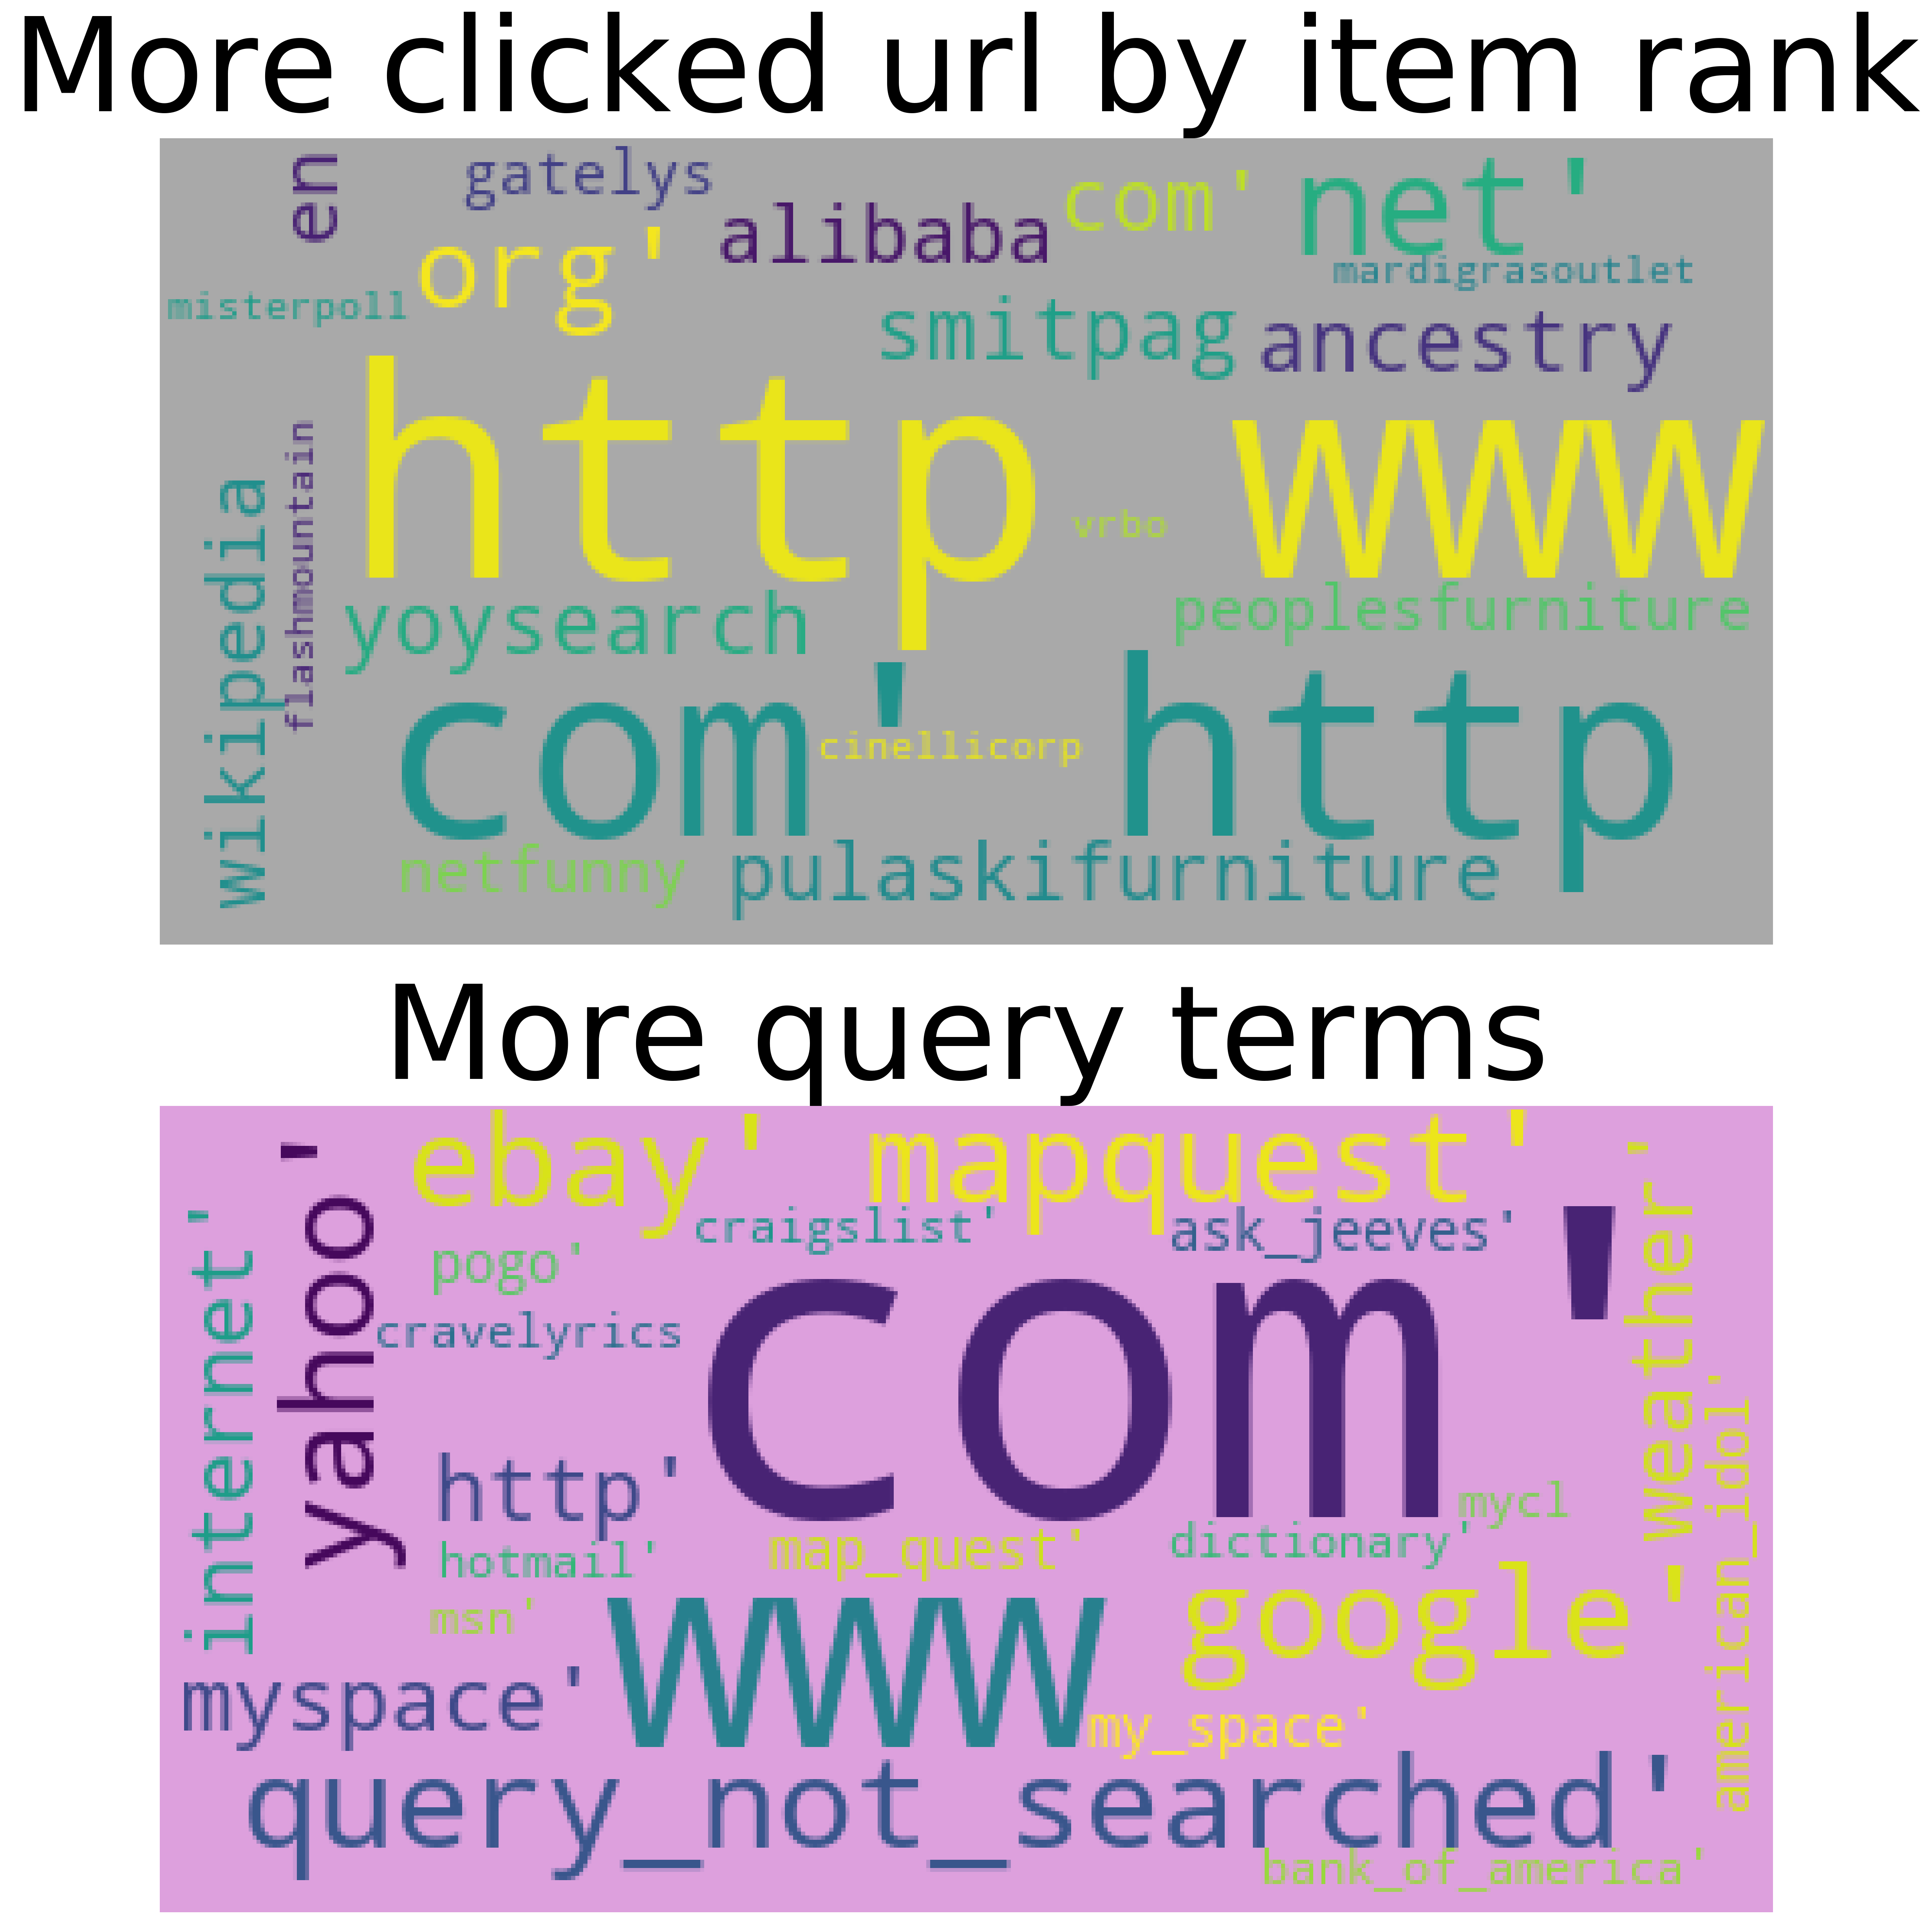

In [58]:
from wordcloud import WordCloud, STOPWORDS

st=pd.Series(dataframe_of_ctart_to_end_line.iloc[0:10000,:].groupby('ClickURL').sum()['ItemRank'].sort_values(ascending=False).head(40).index).head(30)
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(20,20),dpi=300)

for char in range(len(st)):
    st[char]=st[char].replace(' ','_')

wc=WordCloud(max_words=20,stopwords=set(st),background_color='darkgrey',random_state=0).generate(str(st.values[:30]))
ax[0].axis('off')
ax[0].set_title('More clicked url by item rank', size = 80)
ax[0].imshow(wc)




c=np.array(dataframe_of_ctart_to_end_line['Query'].value_counts().head(30).index.unique())
for char in range(len(c)):
    c[char]=c[char].replace(' ','_')

               
wc=WordCloud(max_words=30,stopwords=set(c),background_color='plum',random_state=1).generate(str(c))

ax[1].axis('off')
ax[1].set_title('More query terms', size = 80)

ax[1].imshow(wc)
plt.rcParams['axes.facecolor'] = 'white'

In [59]:
#details of top 30 clicked urls by item rank sum
def find(x):
    if x in itemrank_by_clickurl.iloc[0:10000,:].head(30).index:
        return True
    return False

n=dataframe_of_ctart_to_end_line.iloc[0:10000,:][dataframe_of_ctart_to_end_line.iloc[0:10000,:]['ClickURL'].apply(find)]
print('count of item rank of 30 ascending order clicked url')
n.describe().iloc[:,0]

count of item rank of 30 ascending order clicked url


count     4589.000000
mean     10868.249728
std       6264.566822
min        479.000000
25%       5555.000000
50%      10143.000000
75%      15654.000000
max      22309.000000
Name: AnonID, dtype: float64

In [60]:
pd.crosstab(n['ClickURL'],columns=n['ItemRank']).sort_values(by=2.0,ascending=False)

ItemRank,0.000001,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,10.000000,11.000000,17.000000,20.000000,50.000000,316.000000
ClickURL,,,,,,,,,,,,,,,
http://music.myspace.com,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0
http://www.imdb.com,0,6,3,4,1,0,1,1,0,0,0,0,0,0,0
http://en.wikipedia.org,0,3,2,0,4,1,7,2,2,3,0,0,0,0,1
http://www.google.com,0,235,2,1,0,0,0,0,0,0,1,2,0,0,0
http://www.msn.com,0,7,2,0,0,0,0,0,0,0,0,0,0,0,0
http://www.pogo.com,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0
http://www.amazon.com,0,5,1,1,2,0,0,2,1,0,1,0,1,0,0
http://www.hotmail.com,0,8,1,0,0,0,0,0,0,0,0,0,0,0,0
http://mail.yahoo.com,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
dataframe_of_ctart_to_end_line[dataframe_of_ctart_to_end_line['ClickURL']=='http://en.wikipedia.org']

,AnonID,Query,QueryTime,ItemRank,ClickURL
28,479,allegory of the cave,2006-03-06 22:03:19,6.0,http://en.wikipedia.org
37,479,wikpedia,2006-03-13 18:29:21,1.0,http://en.wikipedia.org
120,479,nip tuck season 3 dvd,2006-05-28 00:47:48,7.0,http://en.wikipedia.org
502,2708,encyclopedia of revenge,2006-03-01 18:25:40,2.0,http://en.wikipedia.org
1821,5085,erikson stages of development,2006-04-16 18:46:01,6.0,http://en.wikipedia.org
...,...,...,...,...,...
3612503,24823445,glasnost,2006-05-30 00:49:31,1.0,http://en.wikipedia.org
3612504,24823445,glasnost,2006-05-30 00:49:31,1.0,http://en.wikipedia.org
3612505,24823445,perestroika,2006-05-30 01:57:16,1.0,http://en.wikipedia.org
3613867,24912930,query not searched,2006-05-31 20:00:54,9.0,http://en.wikipedia.org


Text(0.5, 1.0, 'Distribution of item rank across more clicked url')

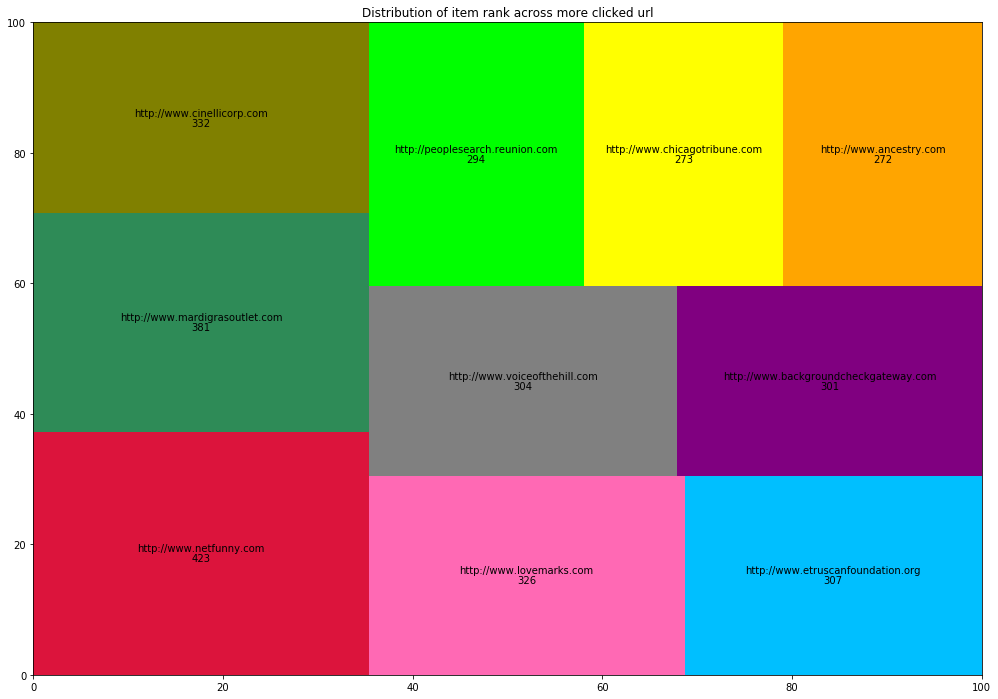

In [62]:
plt.figure(figsize=(17,12))
mean_amount = dataframe_of_ctart_to_end_line.iloc[0:10000,:].groupby('ClickURL').mean()["ItemRank"].astype('int').sort_values(ascending=False).iloc[1:].head(10)
squarify.plot(sizes=mean_amount.values,label=mean_amount.index, value=mean_amount.values,color=['crimson','seagreen','olive','hotpink','deepskyblue','grey','purple','lime','yellow','orange'])
plt.title('Distribution of item rank across more clicked url')

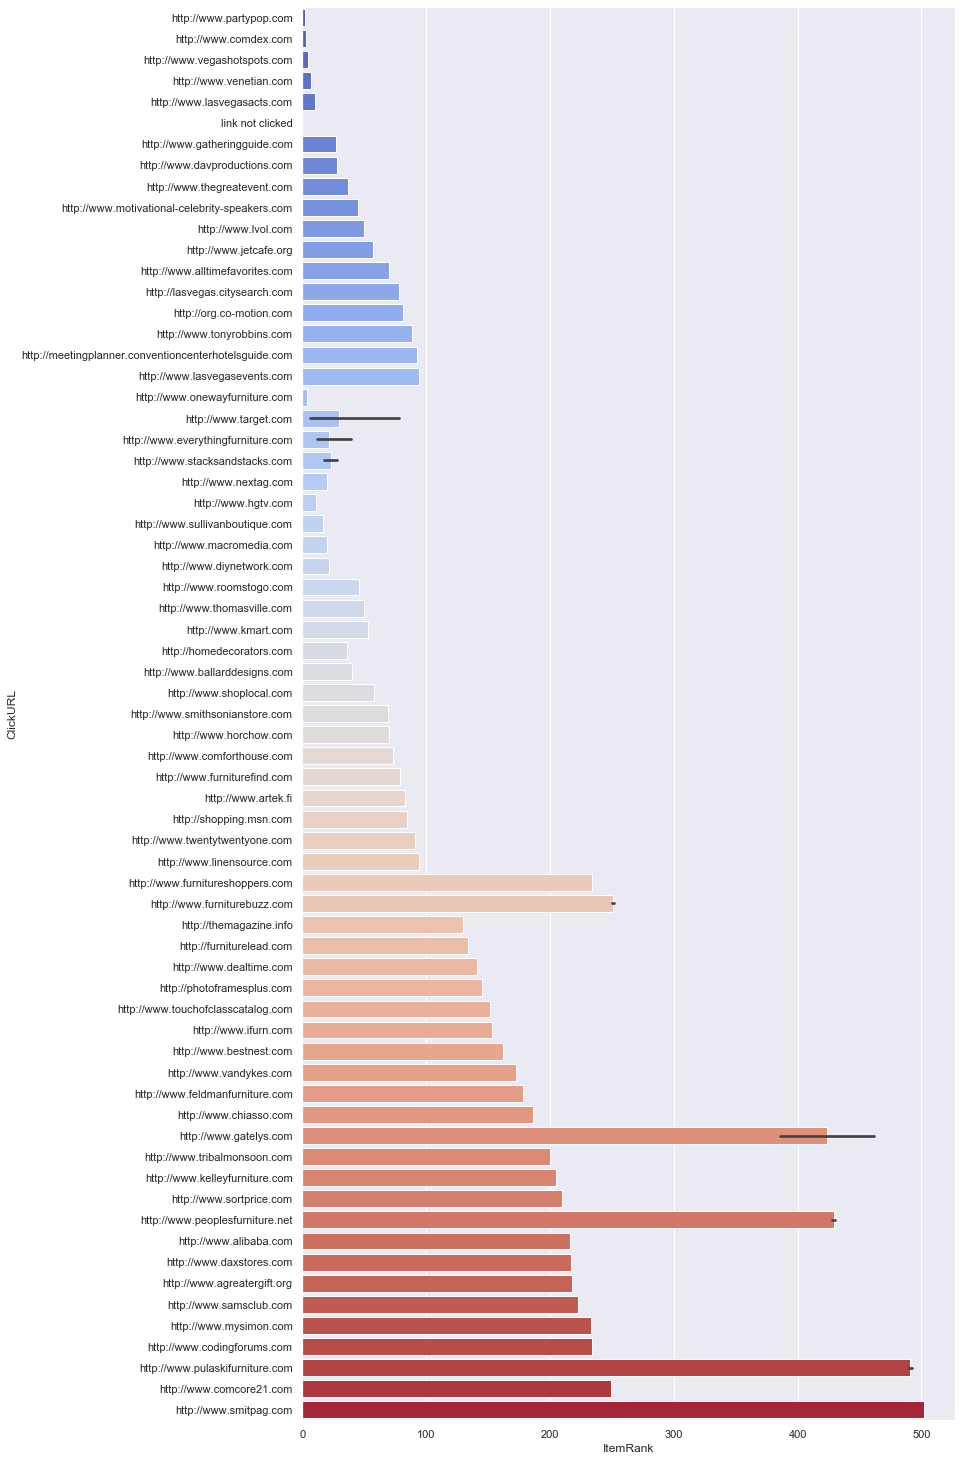

In [63]:
sns.set(rc={'figure.figsize':(11.7,26)})
sns.barplot(y='ClickURL',x='ItemRank',data=dataframe_of_ctart_to_end_line[(dataframe_of_ctart_to_end_line['Query']=='nesting tables')|(dataframe_of_ctart_to_end_line['Query']=='las vegas event companies')],estimator=np.sum,palette='coolwarm')

#average searched query - las vegas event companies
plt.show()

In [64]:
dataframe_of_ctart_to_end_line['QueryTime']=pd.to_datetime(dataframe_of_ctart_to_end_line['QueryTime'],format='%Y/%m/%d %H:%M:%S')

In [65]:
dataframe_of_ctart_to_end_line

,AnonID,Query,QueryTime,ItemRank,ClickURL
0,479,family guy,2006-03-01 16:01:20,0.000001,link not clicked
1,479,also sprach zarathustra,2006-03-02 14:48:55,0.000001,link not clicked
2,479,family guy movie references,2006-03-03 22:37:46,1.000000,http://www.familyguyfiles.com
3,479,top grossing movies of all time,2006-03-03 22:42:42,1.000000,http://movieweb.com
4,479,top grossing movies of all time,2006-03-03 22:42:42,2.000000,http://www.imdb.com
...,...,...,...,...,...
3614501,24969423,my space. com,2006-05-31 19:03:32,2.000000,http://music.myspace.com
3614502,24969423,my space.com,2006-05-31 19:12:00,0.000001,link not clicked
3614503,24969423,my space.com 3131560415,2006-05-31 19:12:25,0.000001,link not clicked
3614504,24969423,jennifer craford my space.com,2006-05-31 19:15:02,0.000001,link not clicked


In [164]:
dnewdf=dataframe_of_ctart_to_end_line.set_index('QueryTime')
dnewdf.head()

,AnonID,Query,ItemRank,ClickURL
QueryTime,,,,
2006-03-01 16:01:20,479,family guy,0.000001,link not clicked
2006-03-02 14:48:55,479,also sprach zarathustra,0.000001,link not clicked
2006-03-03 22:37:46,479,family guy movie references,1.000000,http://www.familyguyfiles.com
2006-03-03 22:42:42,479,top grossing movies of all time,1.000000,http://movieweb.com
2006-03-03 22:42:42,479,top grossing movies of all time,2.000000,http://www.imdb.com


In [67]:
dnewdf["ClickURL"].nunique()

389404

In [68]:
dnewdf["Query"].nunique()

1244492

In [69]:
dnewdf['2006-03']

,AnonID,Query,ItemRank,ClickURL
QueryTime,,,,
2006-03-01 16:01:20,479,family guy,0.000001,link not clicked
2006-03-02 14:48:55,479,also sprach zarathustra,0.000001,link not clicked
2006-03-03 22:37:46,479,family guy movie references,1.000000,http://www.familyguyfiles.com
2006-03-03 22:42:42,479,top grossing movies of all time,1.000000,http://movieweb.com
2006-03-03 22:42:42,479,top grossing movies of all time,2.000000,http://www.imdb.com
...,...,...,...,...
2006-03-28 17:51:10,18955990,jackson hewitt,3.000000,http://www.jackson-hewitt.com
2006-03-28 20:42:08,18956000,elgin il townhomes,1.000000,http://www.internest.com
2006-03-28 18:59:13,18956446,rexelusa.com,2.000000,http://www.rexelarchive.com


In [70]:
print('total number of unique url clicked in may of 2006 = '+str(len(dnewdf['2006-03']['ClickURL'].unique())))
print('total number of unique url clicked in june of 2006 = '+str(len(dnewdf['2006-04']['ClickURL'].unique())))
print('total number of unique url clicked in july of 2006 = '+str(len(dnewdf['2006-05']['ClickURL'].unique())))

total number of unique url clicked in may of 2006 = 206514
total number of unique url clicked in june of 2006 = 153229
total number of unique url clicked in july of 2006 = 180228


In [71]:
print('total number of unique query searched in may of 2006 = '+str(len(dnewdf['2006-03']['ClickURL'].unique())))
print('total number of unique query searched clicked in june of 2006 = '+str(len(dnewdf['2006-04']['ClickURL'].unique())))
print('total number of unique query searched in july of 2006 = '+str(len(dnewdf['2006-05']['ClickURL'].unique())))

total number of unique query searched in may of 2006 = 206514
total number of unique query searched clicked in june of 2006 = 153229
total number of unique query searched in july of 2006 = 180228


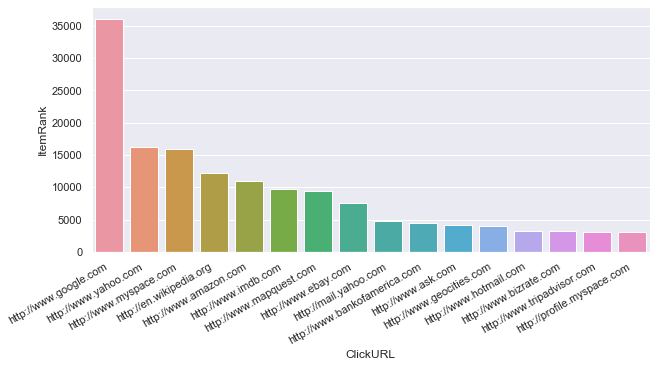

,ItemRank
ClickURL,
http://www.google.com,36103
http://www.yahoo.com,16271
http://www.myspace.com,15977
http://en.wikipedia.org,12275
http://www.amazon.com,11030
http://www.imdb.com,9791
http://www.mapquest.com,9402
http://www.ebay.com,7613
http://mail.yahoo.com,4814


In [72]:
cmi=pd.DataFrame(dnewdf.groupby('ClickURL')['ItemRank'].count().sort_values(ascending=False))
cmi = cmi[1:]
fig=plt.figure(figsize=(10,5))
sns.barplot(y='ItemRank',x='ClickURL',data=cmi.reset_index().head(16))
fig.autofmt_xdate()
plt.show()
cmi.head(16)

In [73]:
cmi.reset_index()

,ClickURL,ItemRank
0,http://www.google.com,36103
1,http://www.yahoo.com,16271
2,http://www.myspace.com,15977
3,http://en.wikipedia.org,12275
4,http://www.amazon.com,11030
...,...,...
389398,http://www.discovercraftnc.org,1
389399,http://www.discovercollinsville.com,1
389400,http://www.discoverclips.com,1
389401,http://www.newyorkpartyshuttle.com,1


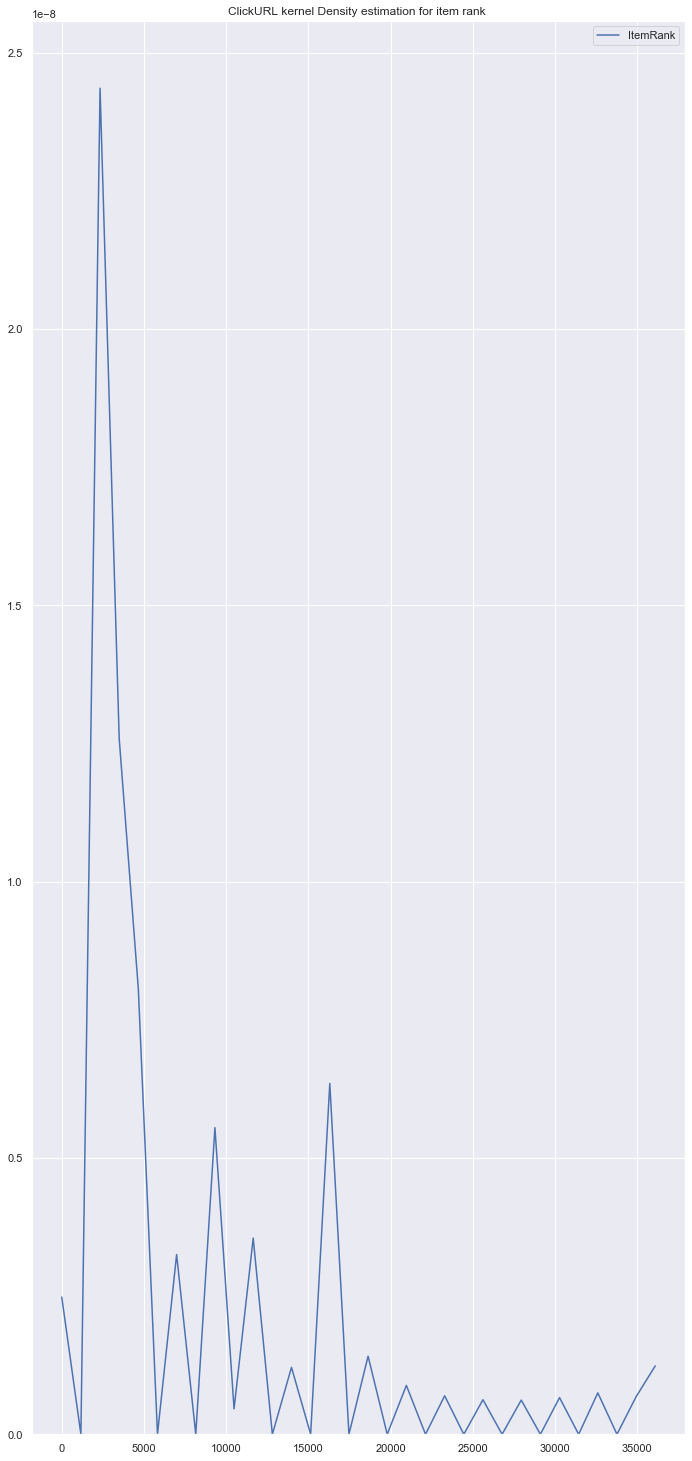

In [74]:
sns.kdeplot(data=cmi.reset_index()['ItemRank'],gridsize=20,)#most are  2 or 3 in number
plt.title('ClickURL kernel Density estimation for item rank ')
plt.show()

In [75]:
dnewdf['2006-03']['ItemRank'].sum()

5021387.650409997

In [76]:
dnewdf['2006-04']['ItemRank'].sum()

3770072.4444689997

In [77]:
dnewdf['2006-05']['ItemRank'].sum()

4691341.584014001

In [199]:
dnewdf[dnewdf.AnonID == 3318459].shape[0]

6925

In [202]:
data_of_user_use_time_on_search_engine_in_second = dnewdf.reset_index(drop = True)
data_of_user_use_time_on_search_engine_in_second = data_of_user_use_time_on_search_engine_in_second[['AnonID']]
data_of_user_use_time_on_search_engine_in_list = data_of_user_use_time_on_search_engine_in_second['AnonID'].value_counts()
data_of_user_use_time_on_search_engine_in_licht

3318459     6925
205414      4663
422471      4198
2426641     4106
3717968     3429
            ... 
21588385       1
16057345       1
23605482       1
23851189       1
13743201       1
Name: AnonID, Length: 66000, dtype: int64

(array([5.3237e+04, 6.4090e+03, 2.5490e+03, 1.3150e+03, 7.9000e+02,
        4.8900e+02, 3.2300e+02, 1.9000e+02, 1.5100e+02, 1.3700e+02,
        9.1000e+01, 5.1000e+01, 5.6000e+01, 3.5000e+01, 2.7000e+01,
        2.3000e+01, 1.8000e+01, 1.8000e+01, 2.1000e+01, 1.9000e+01,
        7.0000e+00, 5.0000e+00, 6.0000e+00, 5.0000e+00, 1.0000e+00,
        2.0000e+00, 4.0000e+00, 4.0000e+00, 2.0000e+00, 1.0000e+00,
        1.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

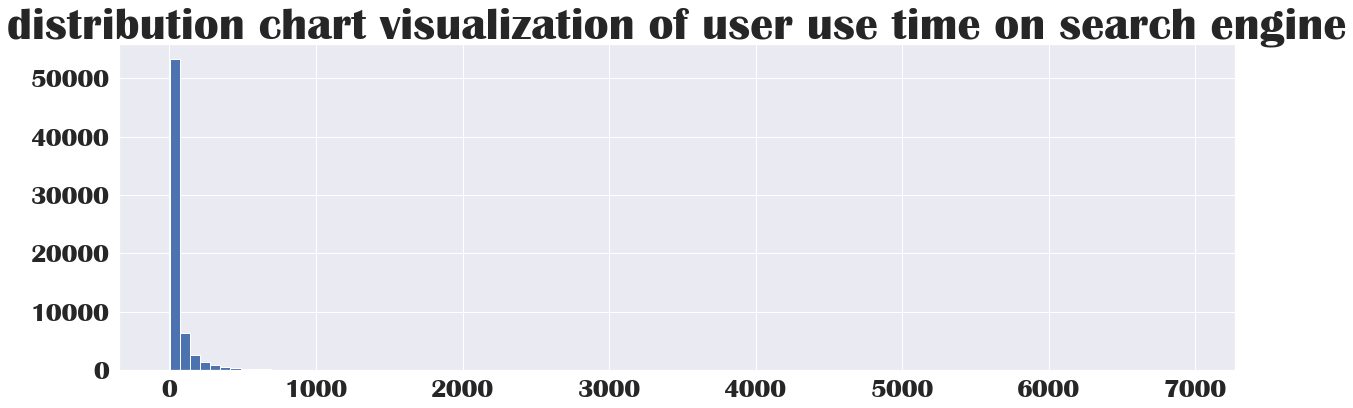

In [211]:
plt.title('distribution chart visualization of user use time on search engine',size = 46)
plt.hist(data_of_user_use_time_on_search_engine_in_licht.tolist(), bins = 100)

In [208]:
plt.rcParams["figure.figsize"] = (20,6)
plt.rcParams['xtick.labelsize'] = 26
plt.rcParams['ytick.labelsize'] = 26

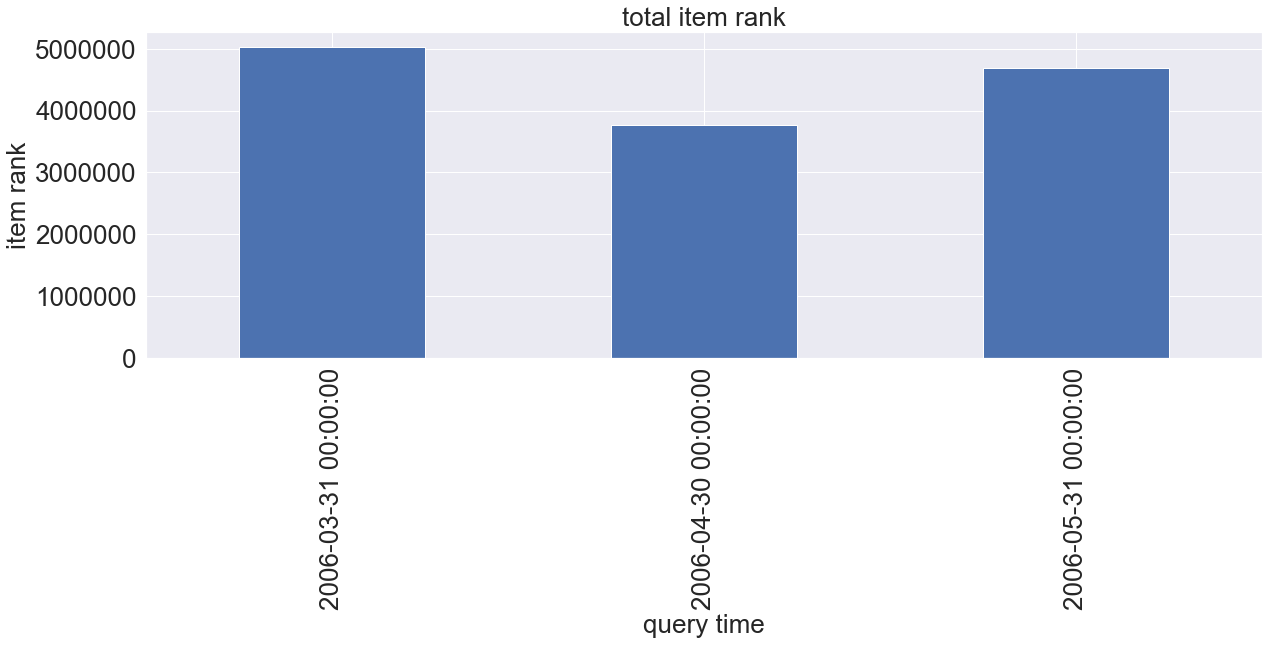

In [79]:
plt.title('total item rank', size = 26)
dnewdf.resample('M')['ItemRank'].sum().plot.bar()
plt.xlabel('query time', fontsize=26)
plt.ylabel('item rank', fontsize=26)
plt.show()

Text(0.5, 1.0, 'average item rank by query time')

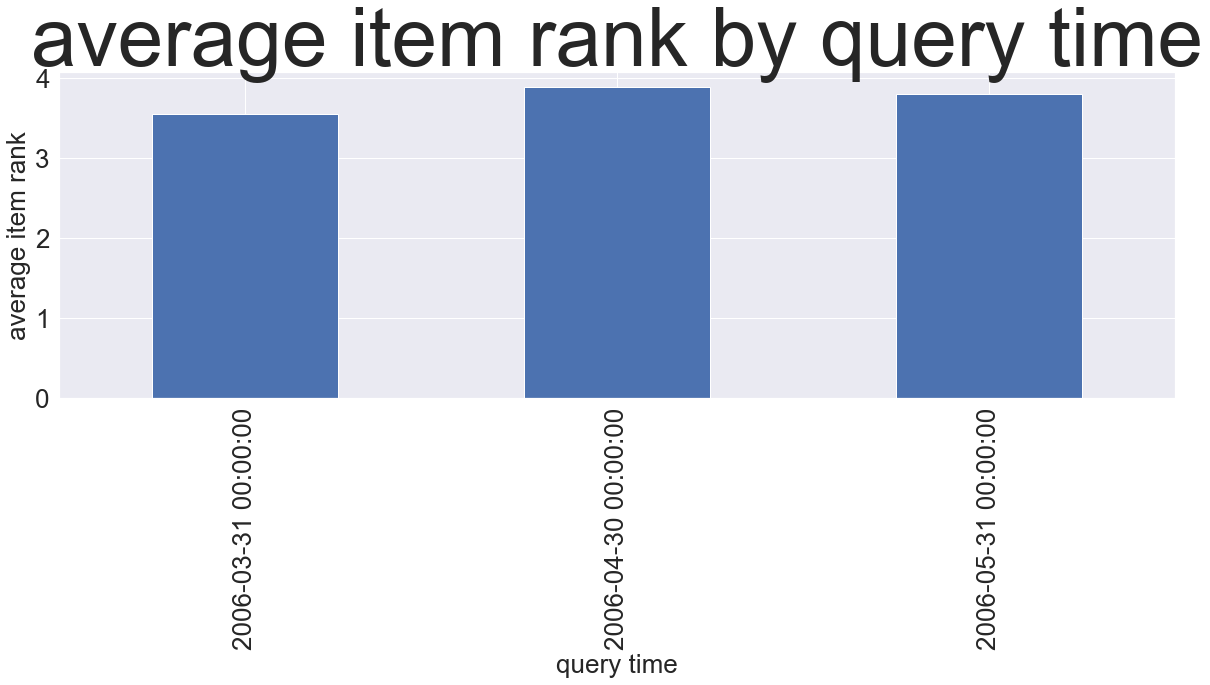

In [80]:
q=dnewdf['ItemRank'].resample('M').mean()
q.plot(kind='bar')
plt.xlabel('query time', fontsize=26)
plt.ylabel('average item rank', fontsize=26)
plt.title('average item rank by query time', size=82)

In [81]:
#rint(dnewdf.index)
dnewdf['month']=dnewdf.index.month
dnewdf['day']=dnewdf.index.day

Text(0.5, 1.0, 'Item rank Variation Per day from 2006-03  to  2006-05')

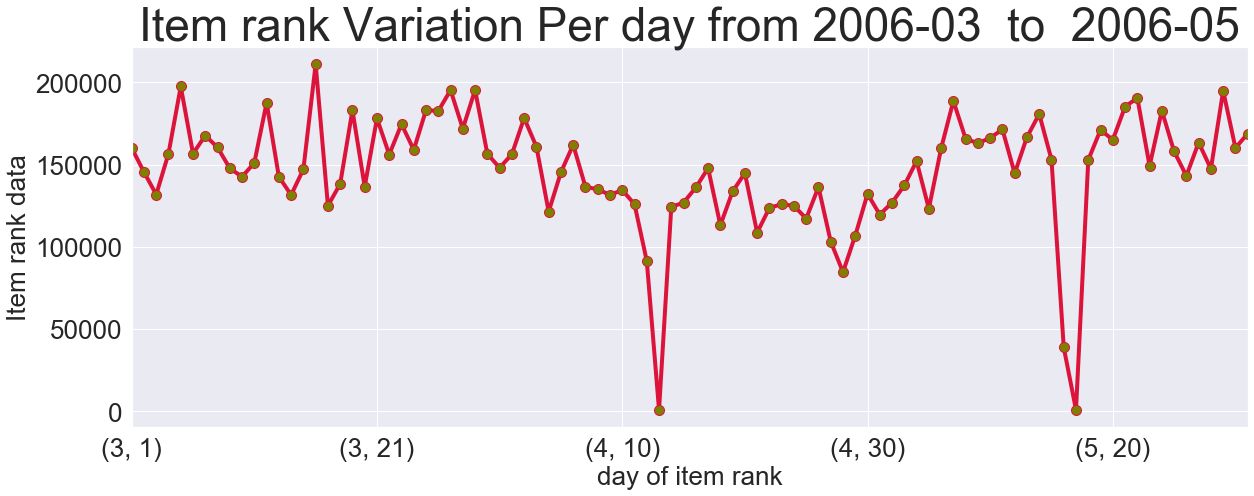

In [82]:
fig =plt.figure(figsize=(20,7))
fig.set_figheight
ts_month = dnewdf.groupby(['month', 'day']).agg({'ItemRank':'sum'})['ItemRank']
ts_month.plot(linewidth=4, color='crimson',marker="o", markersize=10, markerfacecolor='olive')
plt.ylabel('Item rank data', fontsize=26)
plt.xlabel('day of item rank', fontsize=26);
plt.title('Item rank Variation Per day from 2006-03  to  2006-05', size=46)

In [84]:
dataframe_of_ctart_to_end_line.describe()

,AnonID,ItemRank
count,3.614506e+06,3.614506e+06
mean,6.906620e+06,3.730192e+00
std,5.935597e+06,1.544467e+01
min,4.790000e+02,0.000000e+00
25%,2.259100e+06,1.000000e-06
50%,5.035127e+06,1.000000e+00
75%,1.025739e+07,2.000000e+00
max,2.496942e+07,5.000000e+02


Query        0.172089
QueryTime    0.006138
ItemRank    -0.194186
Name: ClickURL, dtype: float64


-----|||||||||     heatmap chart of correlation data     ||||||||-----




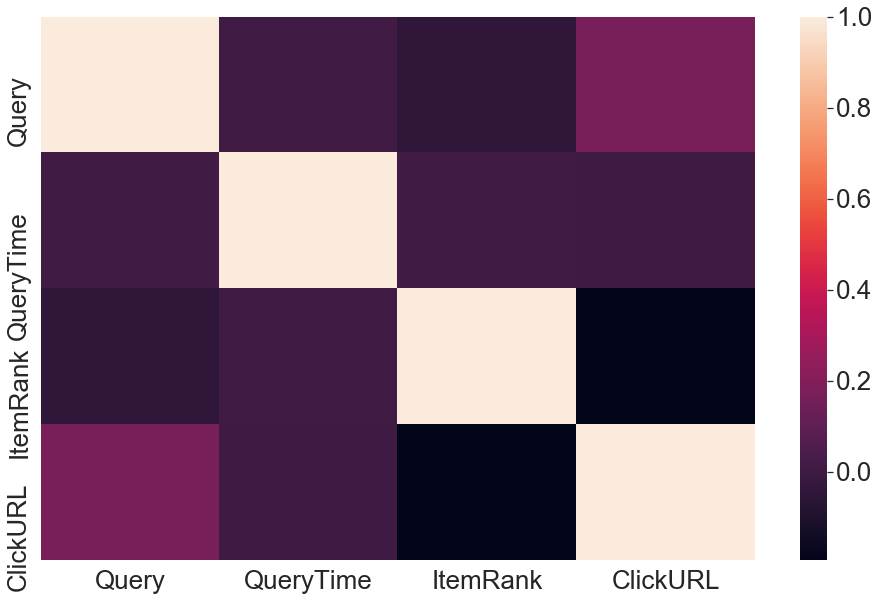

In [86]:
from matplotlib import rcParams

df = df_1
df = df.drop(['AnonID'], axis = 1)

#df = pd.read_csv('copy_file_1.csv', index_col=0, skipfooter=3604506, engine='python')
df = df.dropna(how='any',axis=0) 
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['Query']=le.fit_transform(df['Query'])
df['ClickURL']=le.fit_transform(df['ClickURL'])
df['QueryTime']=le.fit_transform(df['QueryTime'])
processed_analysis_data = df
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(processed_analysis_data)
data_transformed = mms.transform(processed_analysis_data)
i = data_transformed 
data_100 = pd.DataFrame({'Query': i[:, 0], 'QueryTime': i[:, 1], 'ItemRank': i[:, 2], 'ClickURL': i[:, 3]})
i = data_100
corr_data = i[i.columns[0:]].corr()['ClickURL'][:-1].sort_values(ascending=False)
print(corr_data)

corr_heatmap = i.corr()
print("\n\n-----|||||||||     heatmap chart of correlation data     ||||||||-----\n\n")
rcParams['figure.figsize'] = 16, 10
ax = sns.heatmap(corr_heatmap,xticklabels=corr_heatmap.columns,yticklabels=corr_heatmap.columns)
plt.savefig("heatmap correlation data chart of users group")
plt.show()

Query        0.172089
QueryTime    0.006138
ItemRank    -0.194186
Name: ClickURL, dtype: float64


-----|||||||||     heatmap chart of correlation data     ||||||||-----




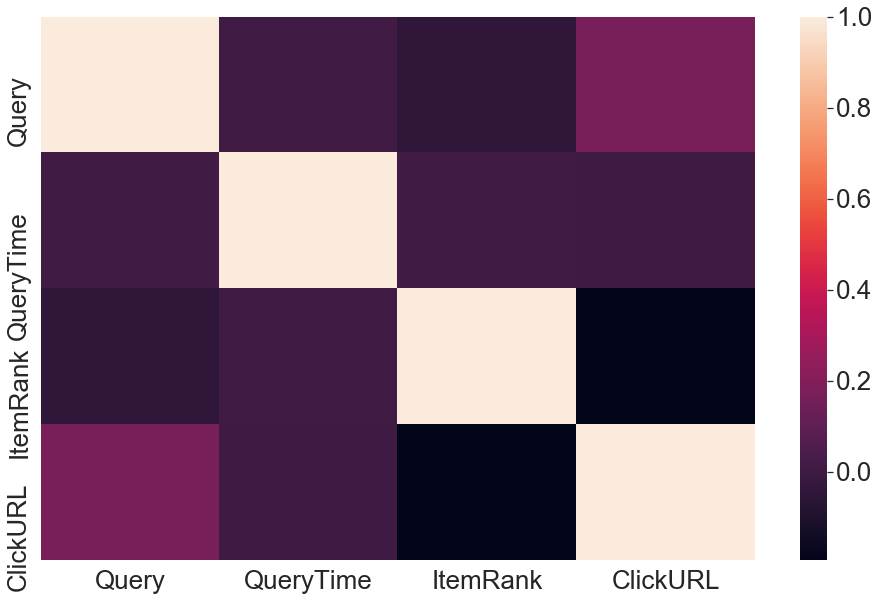

In [87]:
df = df_1
df = df.drop(['AnonID'], axis = 1) 

#df = pd.read_csv('copy_file_1.csv', index_col=0, skipfooter=3604506, engine='python')
df['ItemRank']=df['ItemRank'].fillna(value=0.000001)
df['ClickURL']=df['ClickURL'].fillna(value="link not clicked")
df["Query"] = df["Query"].fillna(value="query not searched")
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['Query']=le.fit_transform(df['Query'])
df['ClickURL']=le.fit_transform(df['ClickURL'])
df['QueryTime']=le.fit_transform(df['QueryTime'])
#processed_analysis_data = df[['AnonID', 'Query', 'QueryTime', 'ClickURL', 'ItemRank']]
processed_analysis_data = df
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(processed_analysis_data)
data_transformed = mms.transform(processed_analysis_data)
i = data_transformed 
data_100 = pd.DataFrame({'Query': i[:, 0], 'QueryTime': i[:, 1], 'ItemRank': i[:, 2], 'ClickURL': i[:, 3]})
i = data_100
corr_data = i[i.columns[0:]].corr()['ClickURL'][:-1].sort_values(ascending=False)
print(corr_data)

corr_heatmap = i.corr()
print("\n\n-----|||||||||     heatmap chart of correlation data     ||||||||-----\n\n")
rcParams['figure.figsize'] = 16, 10
ax = sns.heatmap(corr_heatmap,xticklabels=corr_heatmap.columns,yticklabels=corr_heatmap.columns)
plt.savefig("heatmap correlation data chart of users group")
plt.show()


In [88]:
dataframe_of_ctart_to_end_line = dataframe_of_ctart_to_end_line[["Query", "ClickURL"]]
dataframe_of_ctart_to_end_line

,Query,ClickURL
0,family guy,link not clicked
1,also sprach zarathustra,link not clicked
2,family guy movie references,http://www.familyguyfiles.com
3,top grossing movies of all time,http://movieweb.com
4,top grossing movies of all time,http://www.imdb.com
...,...,...
3614501,my space. com,http://music.myspace.com
3614502,my space.com,link not clicked
3614503,my space.com 3131560415,link not clicked
3614504,jennifer craford my space.com,link not clicked


In [89]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
dataframe_of_ctart_to_end_line['Query']=le.fit_transform(dataframe_of_ctart_to_end_line['Query'])
dataframe_of_ctart_to_end_line['ClickURL']=le.fit_transform(dataframe_of_ctart_to_end_line['ClickURL'])


C:\Users\Home\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Home\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [90]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(dataframe_of_ctart_to_end_line)
data_transformed = mms.transform(dataframe_of_ctart_to_end_line)

In [91]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

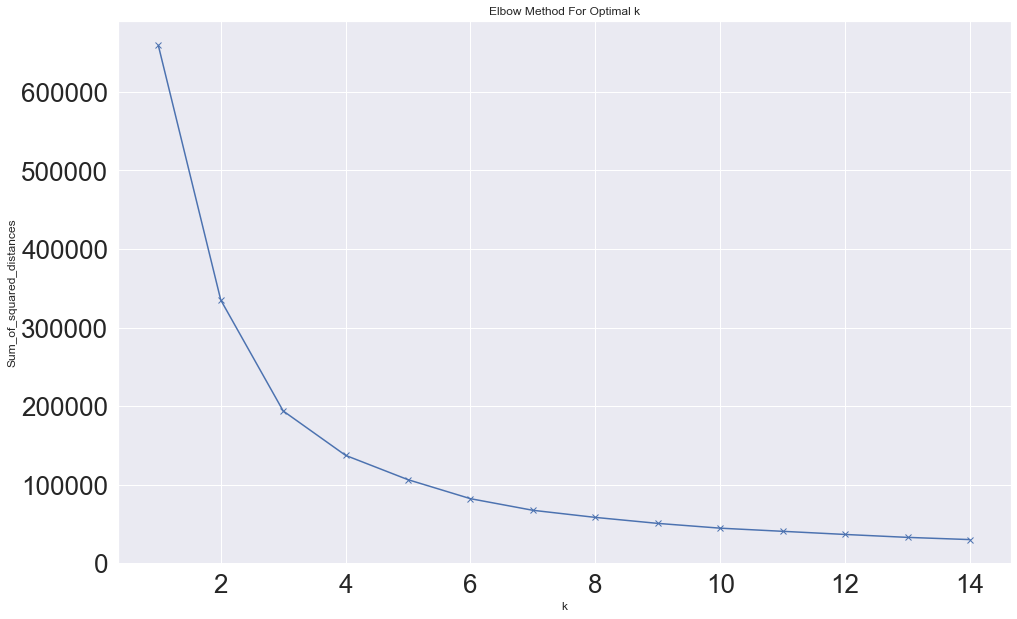

In [92]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Automatically created module for IPython interactive environment
For n_clusters = 5 The average silhouette_score is : 0.3841659678627896
For n_clusters = 6 The average silhouette_score is : 0.41901540432271134
For n_clusters = 7 The average silhouette_score is : 0.4429667966196801
For n_clusters = 8 The average silhouette_score is : 0.4503176818711565
For n_clusters = 10 The average silhouette_score is : 0.4374515286903673


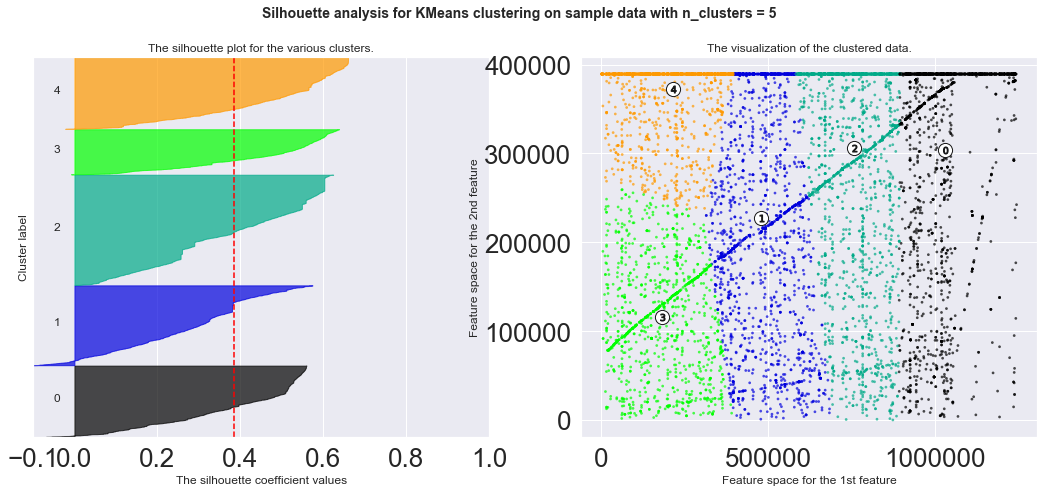

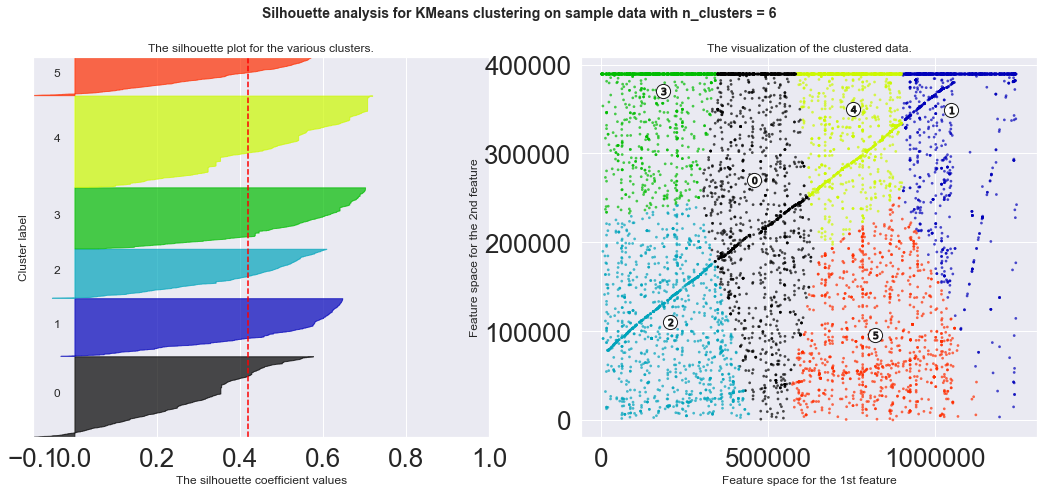

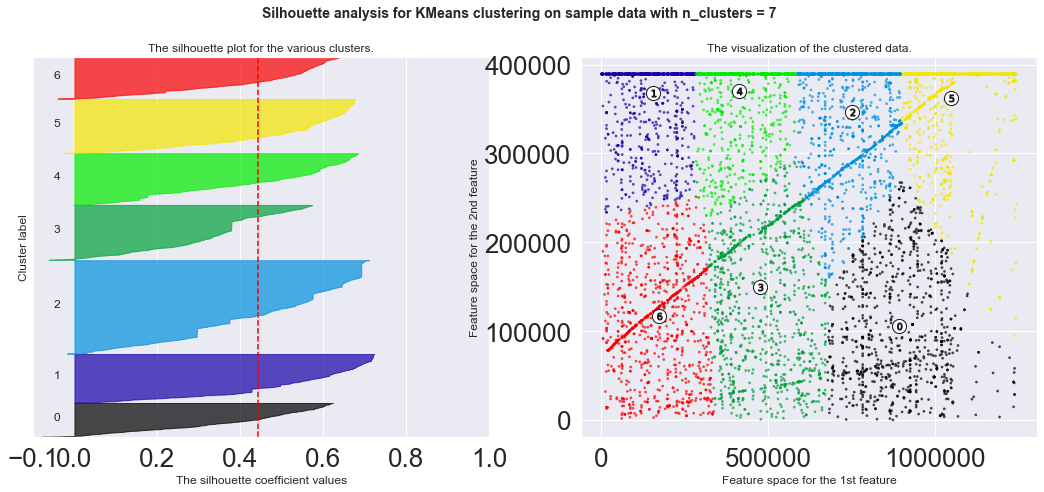

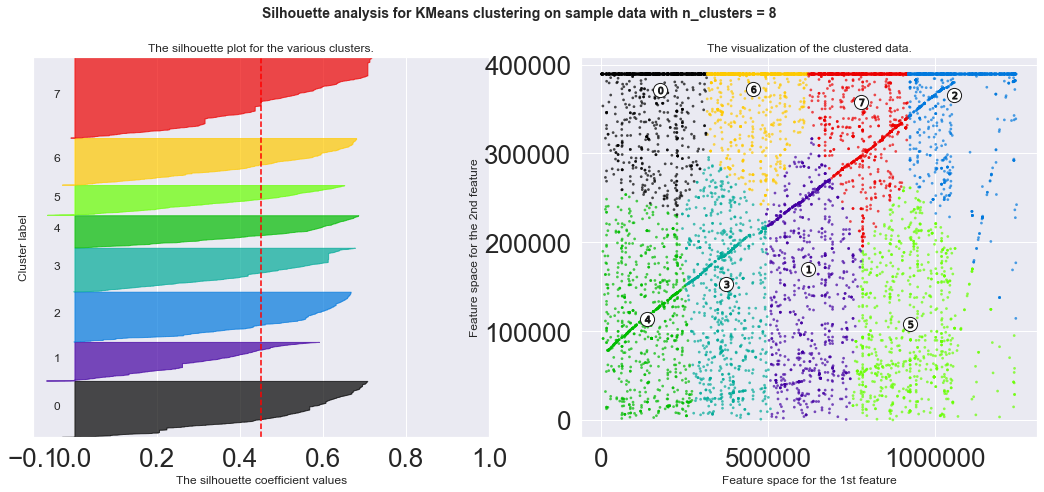

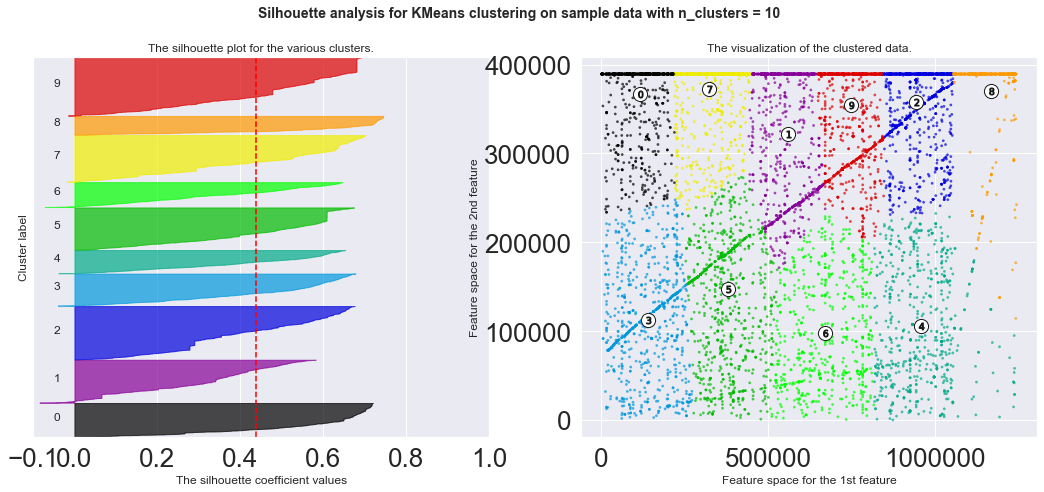

In [93]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)


X = dataframe_of_ctart_to_end_line.iloc[0:10000,:]

range_n_clusters = [5, 6, 7, 8, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


In [94]:
print(type(dataframe_of_ctart_to_end_line.iloc[0:10000,:]))
dataframe_of_ctart_to_end_line.iloc[0:10000,:]

<class 'pandas.core.frame.DataFrame'>


,Query,ClickURL
0,325044,389403
1,47769,389403
2,325063,173881
3,958299,46678
4,958299,212876
...,...,...
9995,11802,111541
9996,11802,273074
9997,595339,241450
9998,595339,241450


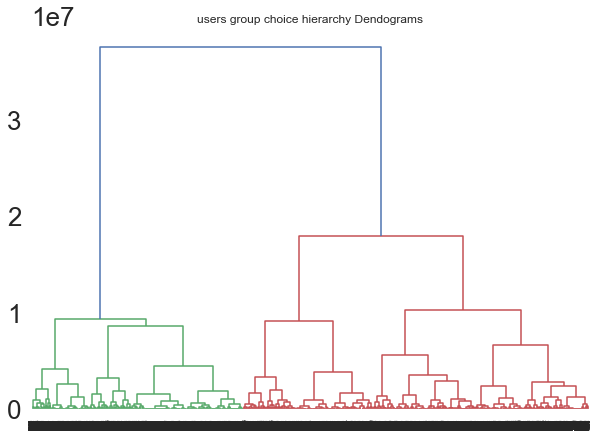

In [95]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("users group choice hierarchy Dendograms")
dend = shc.dendrogram(shc.linkage(dataframe_of_ctart_to_end_line.iloc[0:10000,:], method='ward'))

In [96]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
cluster.fit_predict(dataframe_of_ctart_to_end_line.iloc[0:10000,:])

array([7, 2, 3, ..., 0, 0, 0], dtype=int64)

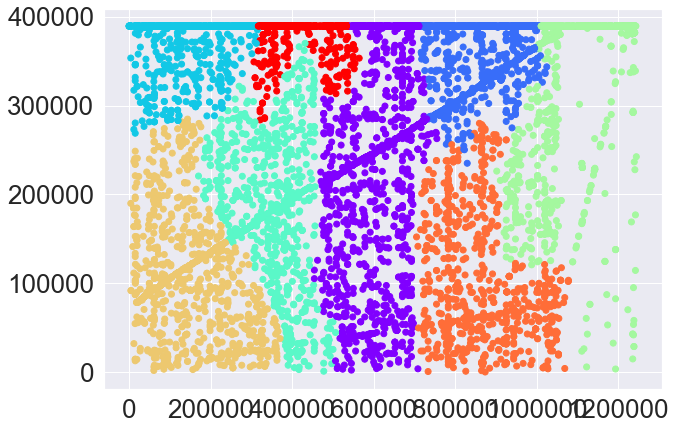

In [97]:
plt.figure(figsize=(10, 7))
plt.scatter(dataframe_of_ctart_to_end_line[['Query']].iloc[0:10000,:], dataframe_of_ctart_to_end_line[['ClickURL']].iloc[0:10000,0], c=cluster.labels_, cmap='rainbow')

In [98]:
processed_analysis_data = dataframe_of_ctart_to_end_line[['Query']]
print(processed_analysis_data)
label = dataframe_of_ctart_to_end_line[["ClickURL"]]
print(label)

          Query
0        325044
1         47769
2        325063
3        958299
4        958299
...         ...
3614501  654450
3614502  654454
3614503  654455
3614504  508045
3614505  508046

[3614506 rows x 1 columns]
         ClickURL
0          389403
1          389403
2          173881
3           46678
4          212876
...           ...
3614501     47121
3614502    389403
3614503    389403
3614504    389403
3614505    389403

[3614506 rows x 1 columns]


In [99]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, log_loss, jaccard_similarity_score, roc_curve, auc
from xgboost import XGBClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from  sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score



def data_size_check_of_dataset_gh(processed_analysis_data, label, val_1):
       
        print("using total of about 3000000 rows will need a lot of time to process during classification and calculation of metrics. \n\nso, ") 
        if(val_1 == 1):
            print("for your selected group 1, recommended rows number is 26000")
            
        if(val_1 == 2):
            print("for your selected group 2, recommended rows number is 10000")
            
        if(val_1 == 3):
            print("for your selected group 3, recommended rows number is 10 to 46")
       
        while True:
            num_gh = input("Please enter an integer number for rows size selection?  \n")
            try:
                val = int(num_gh)
                print("\n\nInput is an integer number.")
                print("Input number is: ", val)
                print("minimum number of rows is 10")
                val = max(val, 10)
                processed_analysis_data = processed_analysis_data.iloc[0:val, :]
                label = label.iloc[0:val,:]
                print("\n\n")
                print("processed_analysis_data new shape = ", processed_analysis_data.shape)
                print("label new shape = ", label.shape)
                print("\n\n")
                data_train, data_test, label_train, label_test = train_test_split(processed_analysis_data, label, test_size = 0.2, random_state = 42)
                return data_train, data_test, label_train, label_test, processed_analysis_data, label
                break;
            except ValueError:
                try:
                    float(num_gh)
                    print("Input is an float number.")
                    print("Input number is: ", num_gh)
                    print("This is not a number. Please enter a valid number")
                except ValueError:
                    try:
                        if (type(num_gh) == type("string_1")):
                            print("Input is an string .")
                            print("Input string is: ", num_gh)
                            print("This is not a number. Please enter a valid number")
                    except ValueError:
                        print("This is not a number. Please enter a valid number")
                        
                        
print("input number   1   for check classification with \n   K_Neighbors_Classifier \n   Decision_Tree_Classifier \n\n")

print("input number   2   for check classification with \n   support_vector_machine \n   Logistic_Regression \n\n")

print("input number   3   for check classification with \n   Stack_Logistic_XGB_Classifier \n   dnns_classifier \n   OneVsOne_Logistic \n   OneVsOne_XGB_Classifier \n   OneVsOne_Stack_Logistic_XGB \n\n")

print("\n\n")

while True:
    num = input("Please enter 1 or 2 or 3 number for algorithm group selection ?  \n")
    
    try:
        val = int(num)
        print("\n\nInput is an integer number.")
        print("Input number is: ", val)
        
        if (val == 1):
            name = "group 1 classification"
            classifiers={
            "K_Neighbors_Classifier": KNeighborsClassifier(), 
            "Decision_Tree_Classifier": DecisionTreeClassifier(random_state = 42),
                        }
            
            print("\n\n")
            print("your algorithm group selection is = ")
            print("\n")
            for key, value in classifiers.items() :
                print(key)
            print("\n\n")
            
            metrics = pd.DataFrame(index = 
                   ['jaccard_index', 'accuracy', 'f1_score', 'precision_score', 'recall_score','cross_validation_score'], 
                       columns = 
                   ["K_Neighbors_Classifier", "Decision_Tree_Classifier"])
         


        if (val == 2):
            name = "group 2 classification"
            classifiers={
            "support_vector_machine": svm.LinearSVC(random_state = 42), 
            "Logistic_Regression": LogisticRegression(random_state = 42)
                        }
            
            print("\n\n")
            print("your algorithm group selection is = ")
            print("\n")
            for key, value in classifiers.items() :
                print(key)
            print("\n\n")
            #['jaccard_index', 'f1_score', 'accuracy', 'cross_validation_score']
            metrics = pd.DataFrame(index = 
                   ['jaccard_index', 'accuracy', 'f1_score', 'precision_score', 'recall_score','cross_validation_score'], 
                       columns = 
                   ["support_vector_machine", "Logistic_Regression"])
            
        if (val == 3):
            name = "group 3 classification"
            classifiers={
            "Stack_Logistic_XGB_Classifier":  StackingClassifier(classifiers=[LogisticRegression(),XGBClassifier(max_depth=2)],use_probas=True, meta_classifier=LogisticRegression()), 
            "dnns_classifier": OneVsRestClassifier(MLPClassifier(hidden_layer_sizes = [100]*5)),
            "OneVsOne_Logistic": OneVsOneClassifier(LogisticRegression()), 
            "OneVsOne_XGB_Classifier": OneVsOneClassifier(XGBClassifier(max_depth=2)),
            "OneVsOne_Stack_Logistic_XGB": OneVsOneClassifier(StackingClassifier(classifiers=[LogisticRegression(),XGBClassifier(max_depth=2)],use_probas=True, meta_classifier=LogisticRegression()))
                        }
            
            print("\n\n")            
            print("your algorithm group selection is = ")
            print("\n")
            for key, value in classifiers.items() :
                print(key)
            print("\n\n")
            
            metrics = pd.DataFrame(index = 
                   ['jaccard_index', 'accuracy', 'f1_score', 'precision_score', 'recall_score','cross_validation_score'],  
                       columns = 
                   ["Stack_Logistic_XGB_Classifier", "dnns_classifier", "OneVsOne_Logistic", "OneVsOne_XGB_Classifier", "OneVsOne_Stack_Logistic_XGB"])

        data_train, data_test, label_train, label_test, processed_analysis_data, label = data_size_check_of_dataset_gh(processed_analysis_data, label, val)
        print("\ndata_train shape = ", data_train.shape)
        print("data_test shape = ", data_test.shape)
        print("label_train shape = ", label_train.shape)
        print("label_test shape = ", label_test.shape)
        print("\n")
        
        break;
    except ValueError:
        try:
            float(num)
            print("Input is an float number.")
            print("Input number is: ", num)
        except ValueError:
            try:
                if(type(num) == type("string_1")):
                    print("Input is an string .")
                    print("Input string is: ", num)
            except ValueError:
                print("This is not a number. Please enter a valid number")

input number   1   for check classification with 
   K_Neighbors_Classifier 
   Decision_Tree_Classifier 


input number   2   for check classification with 
   support_vector_machine 
   Logistic_Regression 


input number   3   for check classification with 
   Stack_Logistic_XGB_Classifier 
   dnns_classifier 
   OneVsOne_Logistic 
   OneVsOne_XGB_Classifier 
   OneVsOne_Stack_Logistic_XGB 





Please enter 1 or 2 or 3 number for algorithm group selection ?  
1


Input is an integer number.
Input number is:  1



your algorithm group selection is = 


K_Neighbors_Classifier
Decision_Tree_Classifier



using total of about 3000000 rows will need a lot of time to process during classification and calculation of metrics. 

so, 
for your selected group 1, recommended rows number is 26000
Please enter an integer number for rows size selection?  
10000


Input is an integer number.
Input number is:  10000
minimum number of rows is 10



processed_analysis_data new shape =  (10000, 1)
lab

In [100]:
print("\n")
print("processed_analysis_data new shape = ", processed_analysis_data.shape)
print("label new shape = ", label.shape)
print("\n\n")
print("\ndata_train shape = ", data_train.shape)
print("data_test shape = ", data_test.shape)
print("label_train shape = ", label_train.shape)
print("label_test shape = ", label_test.shape)
print("\n")
from sklearn.metrics import roc_auc_score        
        
for i, (clf_name, clf) in enumerate(classifiers.items()):

    print("-----------   from " + clf_name + "   ------------")
    
    if clf_name == "K_Neighbors_Classifier":
        clf.fit(data_train, label_train)
        y_pred = clf.predict(data_test)
        
    elif clf_name == "Decision_Tree_Classifier":
        clf.fit(data_train, label_train)
        y_pred = clf.predict(data_test)
        
    elif clf_name == "support_vector_machine":
        clf.fit(data_train, label_train)
        y_pred = clf.predict(data_test)
        
    
    elif (clf_name == "OneVsOne_XGB_Classifier" or clf_name == "OneVsOne_Stack_Logistic_XGB"):
        clf.fit(data_train, label_train)
        y_pred = clf.predict(data_test.values)
        
    elif (clf_name == "dnns_classifier"):
        clf.fit(np.array(data_train), label_train)
        y_pred = clf.predict(data_test)
        
    else: 
        clf.fit(data_train, label_train)
        y_pred = clf.predict(data_test)
    
    n_errors = (y_pred != label_test.values).sum()

    print("\n\n\n")
    
    # error in prediction
    print('{} {} {}: {}'.format("error in " ,clf_name, "prediction", n_errors))
    
    print("\n\n")
    
    # accuracy score in prediction
    print("accuracy score in prediction: ")
    gh2 = accuracy_score(label_test, y_pred)
    print(gh2)
    
    
    # model accuracy
    print("model accuracy: ")
    if (clf_name == "OneVsOne_XGB_Classifier" or clf_name == "OneVsOne_Stack_Logistic_XGB"):
        print(clf.score(data_test.values, label_test))
    else:
        print(clf.score(data_test, label_test))
    
    
    # cross validation score
    print("cross validation score: ")
    if (clf_name == "OneVsOne_XGB_Classifier" or clf_name == "OneVsOne_Stack_Logistic_XGB"):
        cross_val = cross_val_score(clf, processed_analysis_data.values, label.values, scoring='accuracy', cv=10)
    else:
        cross_val = cross_val_score(clf, processed_analysis_data, label, scoring='accuracy', cv=10)
    print(cross_val)
    print("cross_validation_score.mean(): ")
    gh1 = cross_val.mean()
    print(gh1)
   
    
    print("\n\n")
    
    # confusion_matrix
    print("confusion matrix: ")
    print(confusion_matrix(label_test, y_pred))
    
    print("\n\n")
    
    print("f1_score by average as macro : {}".format(f1_score(label_test, y_pred, average='macro')))

    print("f1_score by average as micro : {}".format(f1_score(label_test, y_pred, average='micro')))

    print("f1_score by average as weighted : {}".format(f1_score(label_test, y_pred, average='weighted')))
    gh3 = f1_score(label_test, y_pred, average=None)
    print("f1_score by average as None : {}".format(gh3))

    print("\n\n")
    gh6 = jaccard_similarity_score(label_test, y_pred)
    print("jaccard similarity score 1 : {}".format(gh6))

    print("jaccard similarity score 2 : {}".format(jaccard_similarity_score(label_test, y_pred, normalize=False)))
    
    print("\n\n")
        
    if (clf_name == "support_vector_machine" or clf_name == "OneVsOne_Logistic"):
        pred = clf.decision_function(data_test)
         
    elif (clf_name == "OneVsOne_XGB_Classifier" or clf_name == "OneVsOne_Stack_Logistic_XGB"):
        pred = clf.decision_function(data_test.values)
        
    else: 
        pred = clf.predict_proba(data_test)
        
    #print("log loss : {}".format(log_loss(label_test, pred)))
    
    print("\n\n")
    
    print("precision score with average value as micro: {}".format(precision_score(label_test, y_pred, average="micro")))
    print("precision score with average value as macro: {}".format(precision_score(label_test, y_pred, average="macro")))
    print("precision score with average value as weighted: {}".format(precision_score(label_test, y_pred, average="weighted")))
    
    print("\n\n")
    
    print("recall score with average value as micro: {}".format(recall_score(label_test, y_pred, average="micro")))
    print("recall score with average value as macro: {}".format(recall_score(label_test, y_pred, average="macro")))
    print("recall score with average value as weighted: {}".format(recall_score(label_test, y_pred, average="weighted")))
    
    print("\n\n")
    label_test_unique = label_test["ClickURL"].unique()
    print("unique values in y_true = ", label_test_unique)
    n_classes_label = label_test["ClickURL"].nunique()
    print("number of unique classes in y_true = ", n_classes_label)
       
    y_pred_unique =  np.unique(y_pred)
    print("unique values in y_pred = ", y_pred_unique)
    n_classes_pred = len(y_pred_unique)
    print("number of unique classes in y_pred = ", n_classes_pred) 
       
    # classification report
    print("classification report: ")
    print(classification_report(label_test, y_pred)) 
    
    print("\n\n\n")
    
    print(clf_name + " classifier section end. ")
    print("\n\n--------------------------------------------------------- \n\n")
    print("\n \n")
    
    classification_report_data = classification_report(label_test, y_pred, output_dict=True)
    
    classification_report_df = pd.DataFrame(classification_report_data).transpose()
    classification_report_df.to_csv(clf_name+ " classification report" +'.csv', index= True)
    
    precision_weighted = classification_report_df["precision"][classification_report_df.index[-1]]
    recall_weighted = classification_report_df["recall"][classification_report_df.index[-1]]
    f1_score_weighted = classification_report_df["f1-score"][classification_report_df.index[-1]]
    
    print("f1_score_weighted = ", f1_score_weighted)
    print("precision_weighted = ", precision_weighted)
    print("recall_weighted = ", recall_weighted)
    
    metrics.loc['jaccard_index', clf_name] = gh6
    metrics.loc['accuracy', clf_name] = gh2
    metrics.loc["f1_score", clf_name] = f1_score_weighted
    metrics.loc['precision_score', clf_name] = precision_weighted
    metrics.loc['recall_score', clf_name] = recall_weighted
    metrics.loc['cross_validation_score', clf_name] = gh1
    
    



processed_analysis_data new shape =  (10000, 1)
label new shape =  (10000, 1)




data_train shape =  (8000, 1)
data_test shape =  (2000, 1)
label_train shape =  (8000, 1)
label_test shape =  (2000, 1)


-----------   from K_Neighbors_Classifier   ------------


C:\Users\Home\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().






error in  K_Neighbors_Classifier prediction: 3262386



accuracy score in prediction: 
0.3875
model accuracy: 
0.3875
cross validation score: 


C:\Users\Home\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Home\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Home\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Home\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.

[0.10932077 0.28528302 0.46335404 0.59125189 0.52542373 0.39059675
 0.49427481 0.30994152 0.46906188 0.79674797]
cross_validation_score.mean(): 
0.4435256362126423



confusion matrix: 
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0 542]]





C:\Users\Home\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Home\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Home\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\Users\Home\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_sim

f1_score by average as macro : 0.04444964423756823
f1_score by average as micro : 0.3875
f1_score by average as weighted : 0.35174598710960736
f1_score by average as None : [0.         0.         0.         ... 0.         0.         0.63206997]



jaccard similarity score 1 : 0.3875
jaccard similarity score 2 : 775






precision score with average value as micro: 0.3875
precision score with average value as macro: 0.03944406184117004
precision score with average value as weighted: 0.326409461852747



recall score with average value as micro: 0.3875
recall score with average value as macro: 0.057773678764412896
recall score with average value as weighted: 0.3875



unique values in y_true =  [246443  36329 389403 324693 208657 292533 224301 320257 193120 373239
  14898 237691 255244  94129 269839 143558  32036  92855 129502 152396
 382041 220196 230365 284520 156408 379657 186166 228060 310997 100004
 356473 315221 340950 377016 138513  94333 296859 197092 135609 104448
  31481 24199

C:\Users\Home\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Home\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


f1_score_weighted =  0.35174598710960736
precision_weighted =  0.326409461852747
recall_weighted =  0.3875
-----------   from Decision_Tree_Classifier   ------------




error in  Decision_Tree_Classifier prediction: 3371066



accuracy score in prediction: 
0.406
model accuracy: 
0.406
cross validation score: 


C:\Users\Home\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[0.15493307 0.36       0.44596273 0.53092006 0.53559322 0.34177215
 0.46946565 0.31384016 0.38123752 0.81707317]
cross_validation_score.mean(): 
0.4350797734885214



confusion matrix: 
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   1 ...   0   0 522]]



f1_score by average as macro : 0.07301434737320407
f1_score by average as micro : 0.40599999999999997
f1_score by average as weighted : 0.39131153767772237
f1_score by average as None : [0.         0.         0.         ... 0.         0.         0.66159696]



jaccard similarity score 1 : 0.406
jaccard similarity score 2 : 812






precision score with average value as micro: 0.406
precision score with average value as macro: 0.06828852656414922
precision score with average value as weighted: 0.38530964964602454



recall score with average value as micro: 0.406
recall score with average value as macro: 0.08649

C:\Users\Home\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Home\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Home\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\Users\Home\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_sim

              precision    recall  f1-score   support

         193       0.00      0.00      0.00         1
         743       0.00      0.00      0.00         1
        1057       0.00      0.00      0.00         0
        1700       0.00      0.00      0.00         0
        1892       0.00      0.00      0.00         0
        2928       0.00      0.00      0.00         0
        3351       0.00      0.00      0.00         1
        3554       0.00      0.00      0.00         1
        4016       0.00      0.00      0.00         1
        4114       0.00      0.00      0.00         0
        4892       0.00      0.00      0.00         1
        4924       1.00      1.00      1.00         1
        4951       0.00      0.00      0.00         0
        5134       0.00      0.00      0.00         0
        5742       0.00      0.00      0.00         0
        6734       0.33      1.00      0.50         1
        6863       0.00      0.00      0.00         0
        7096       0.00    

f1_score_weighted =  0.39131153767772237
precision_weighted =  0.38530964964602454
recall_weighted =  0.406


# 

In [101]:
metrics_in_percentage = 100*metrics 
metrics_in_percentage.to_csv(name+" metrics"+'.csv', index= True)
metrics_in_percentage

,K_Neighbors_Classifier,Decision_Tree_Classifier
jaccard_index,38.75,40.6
accuracy,38.75,40.6
f1_score,35.1746,39.1312
precision_score,32.6409,38.531
recall_score,38.75,40.6
cross_validation_score,44.3526,43.508


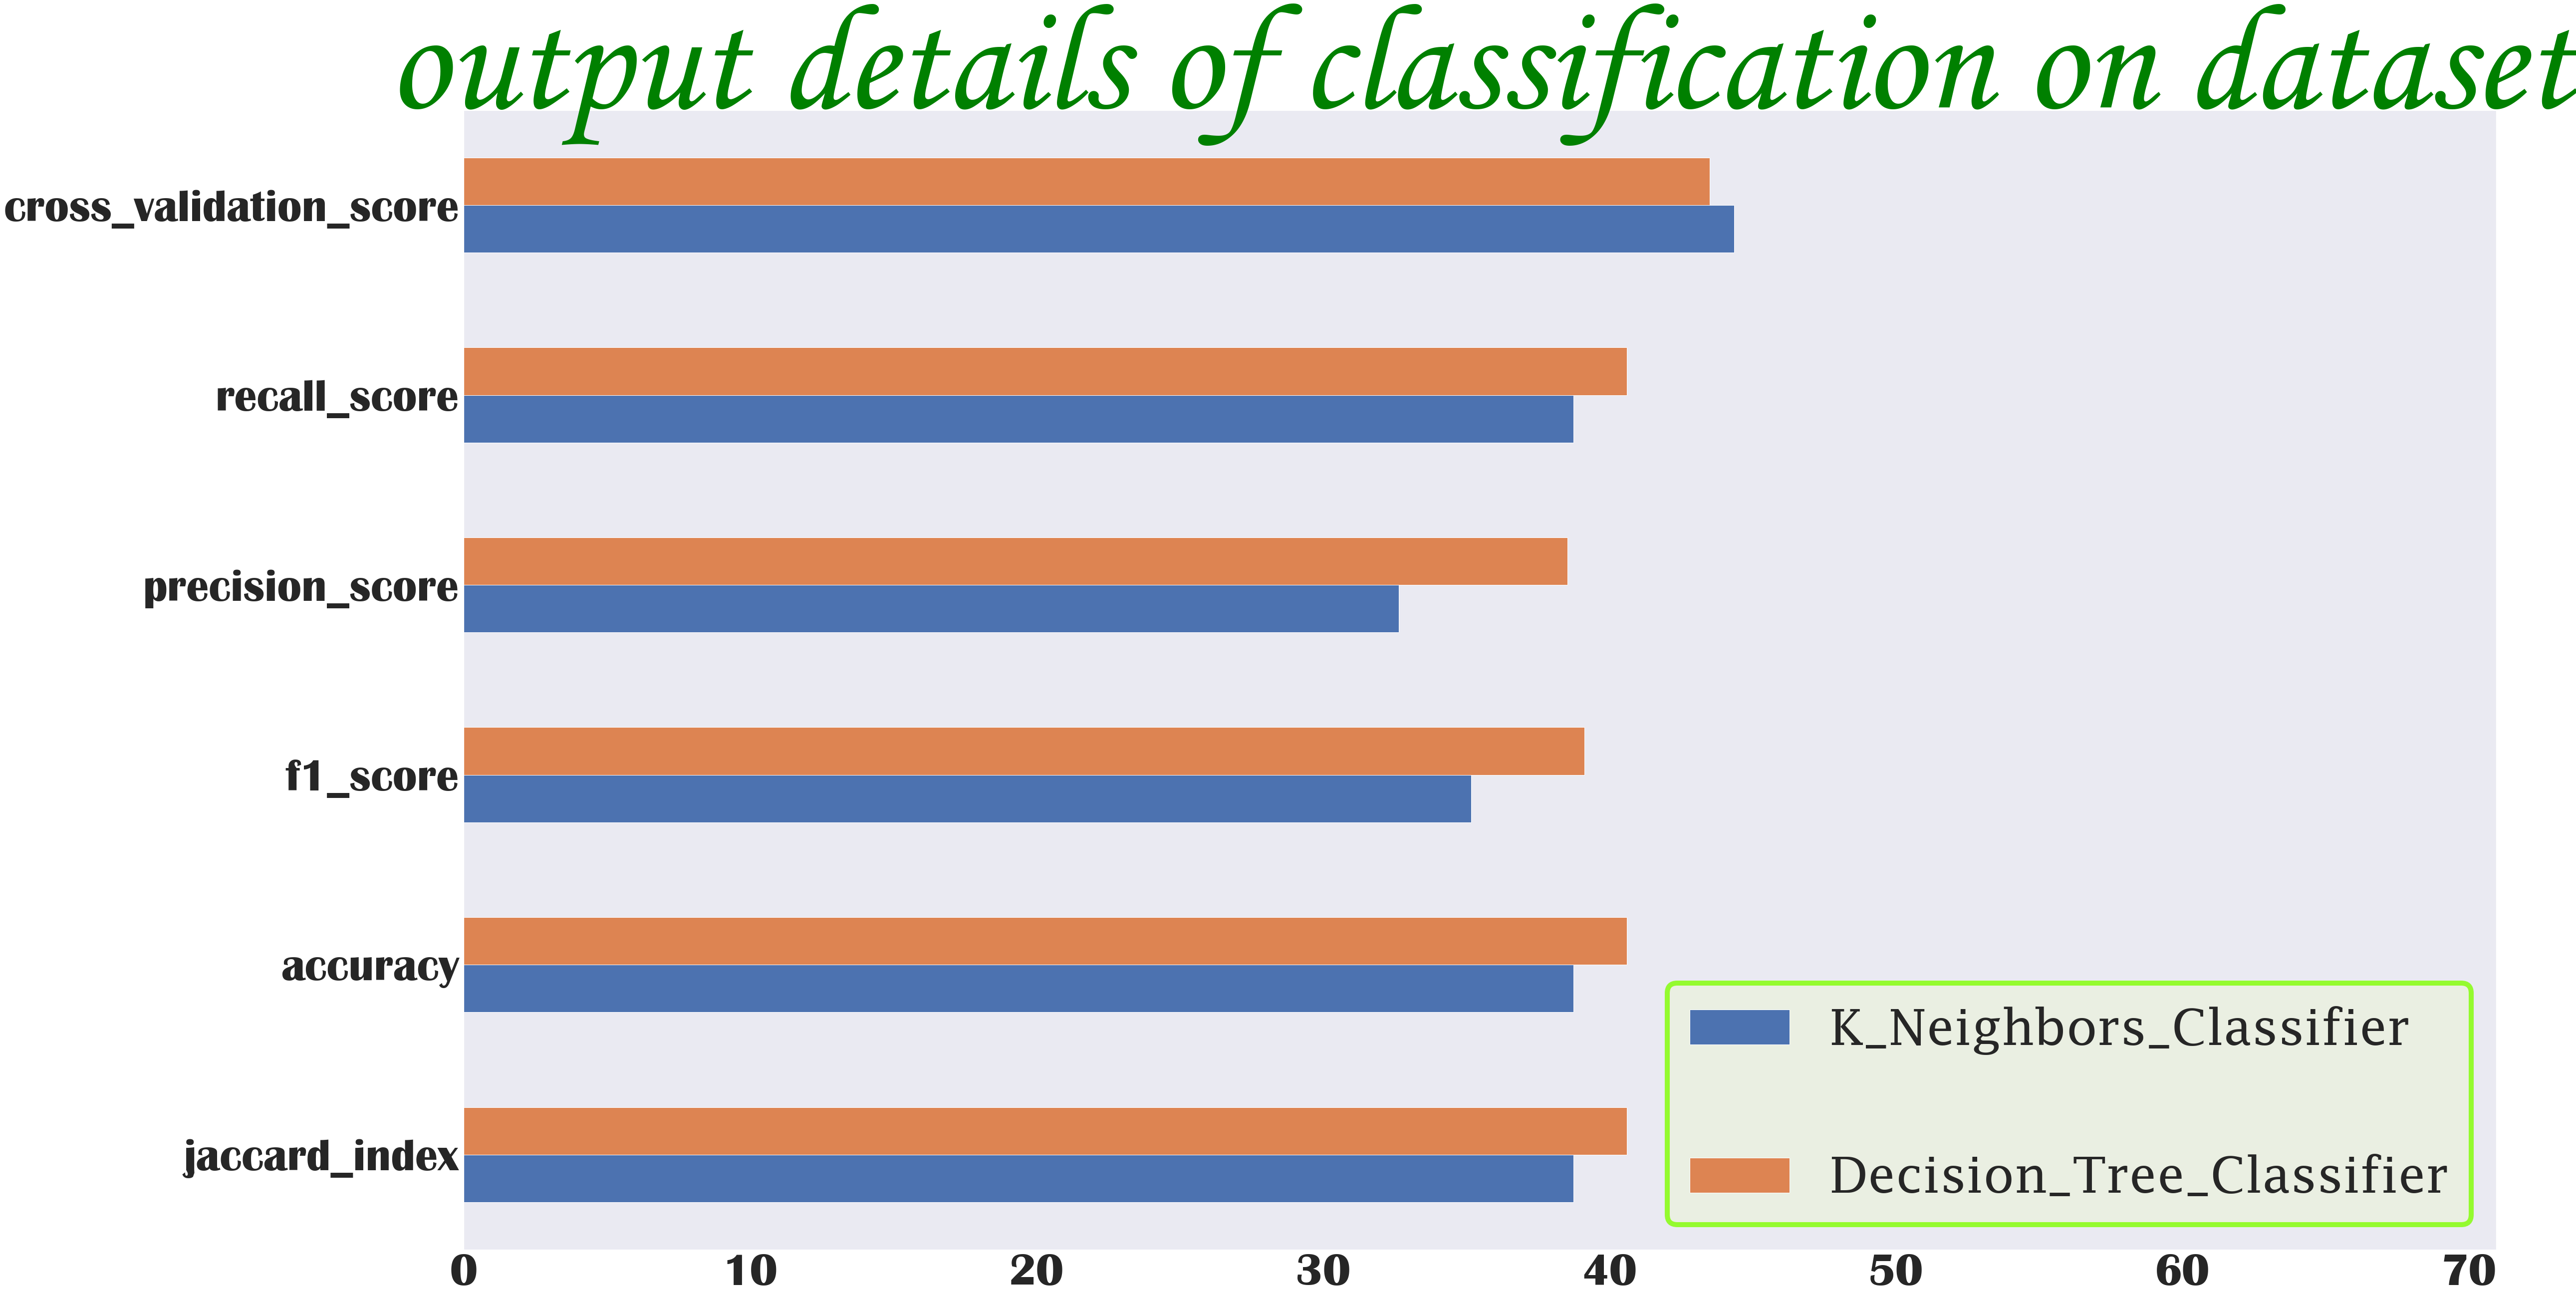

In [102]:
import matplotlib.font_manager as font_manager

metrics_in_percentage = (100*metrics)
font = font_manager.FontProperties(family='Lucida Fax', size=100)
rcParams['font.family'] = 'Britannic Bold'
fig, ax = plt.subplots(figsize = (73, 42)) 
metrics_in_percentage.plot(kind = 'barh', ax = ax, fontsize = 90) 
#plt.rcParams["font.family"] = "Monotype Corsiva"

title_font = {'fontname':'Monotype Corsiva'}
#legend_font = {'fontname':'Impact'}

plt.title(label = "output details of classification on dataset", color = "green", fontsize = 300, loc = "center", fontweight = "bold", **title_font)
legend = ax.legend()


legend = ax.legend(loc = "best", labelspacing=2, borderpad=0.45, prop=font)
legend
frame = legend.get_frame()
frame.set_facecolor("#EBF1DE")
frame.set_edgecolor('chartreuse')
frame.set_linewidth(10)
ax.margins(0.6)
ax.grid()
plt.savefig("output details of classification on dataset")